In [1]:
import pickle
import nltk
from yhelper import wordcloud_auto, clean_text_round, s_and_p, simple_bar

# Nevada

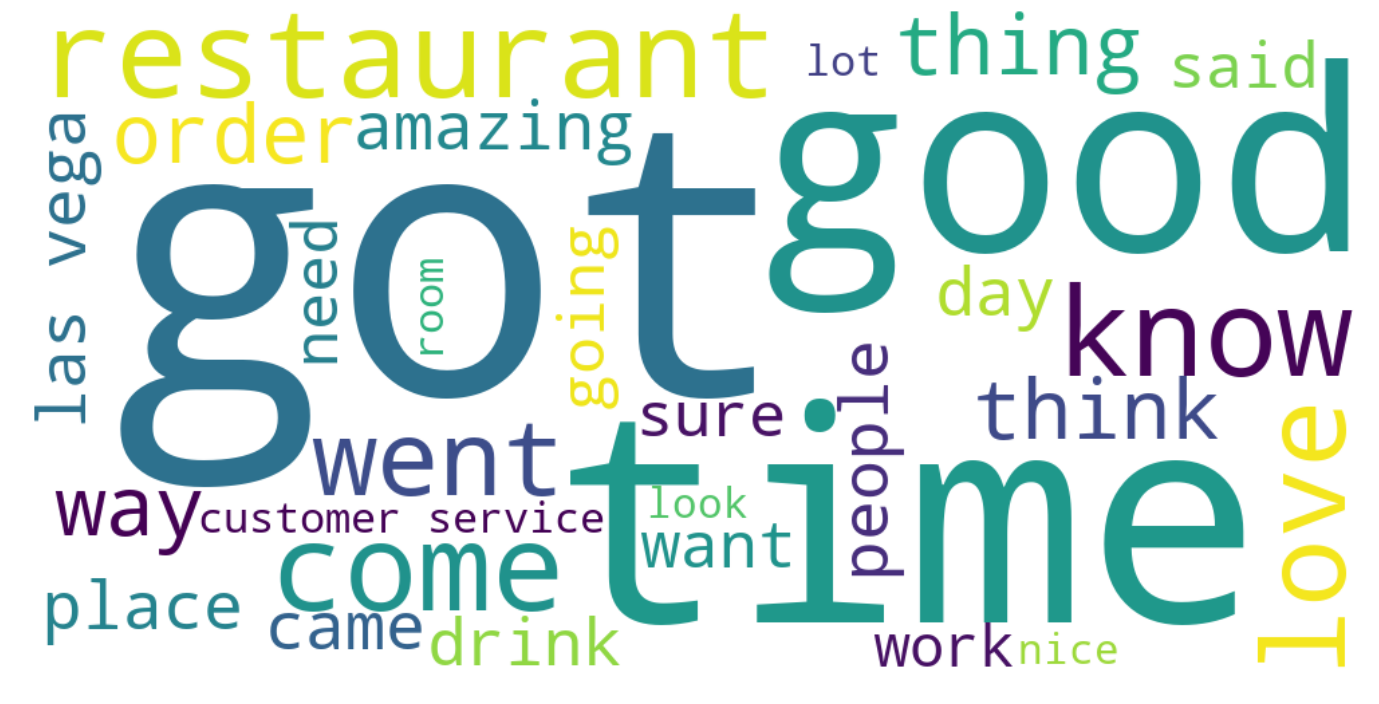

In [2]:
df_nv = pickle.load(open("by_states/df_nv.p", 'rb'))

df_nv.text = df_nv.text.apply(lambda x: clean_text_round(x))
clean_nv = df_nv
s_and_p(clean_nv)
pickle.dump(clean_nv, open('post_eda/eda_nv.p', 'wb'))

wordcloud_auto(clean_nv)

[(('las', 'vegas'), 6456),
 (('customer', 'service'), 5647),
 (('highly', 'recommend'), 3485),
 (('food', 'good'), 2667),
 (('great', 'service'), 2485),
 (('pretty', 'good'), 2416),
 (('ice', 'cream'), 2352),
 (('service', 'great'), 2221),
 (('dont', 'know'), 2103),
 (('love', 'place'), 2084)]

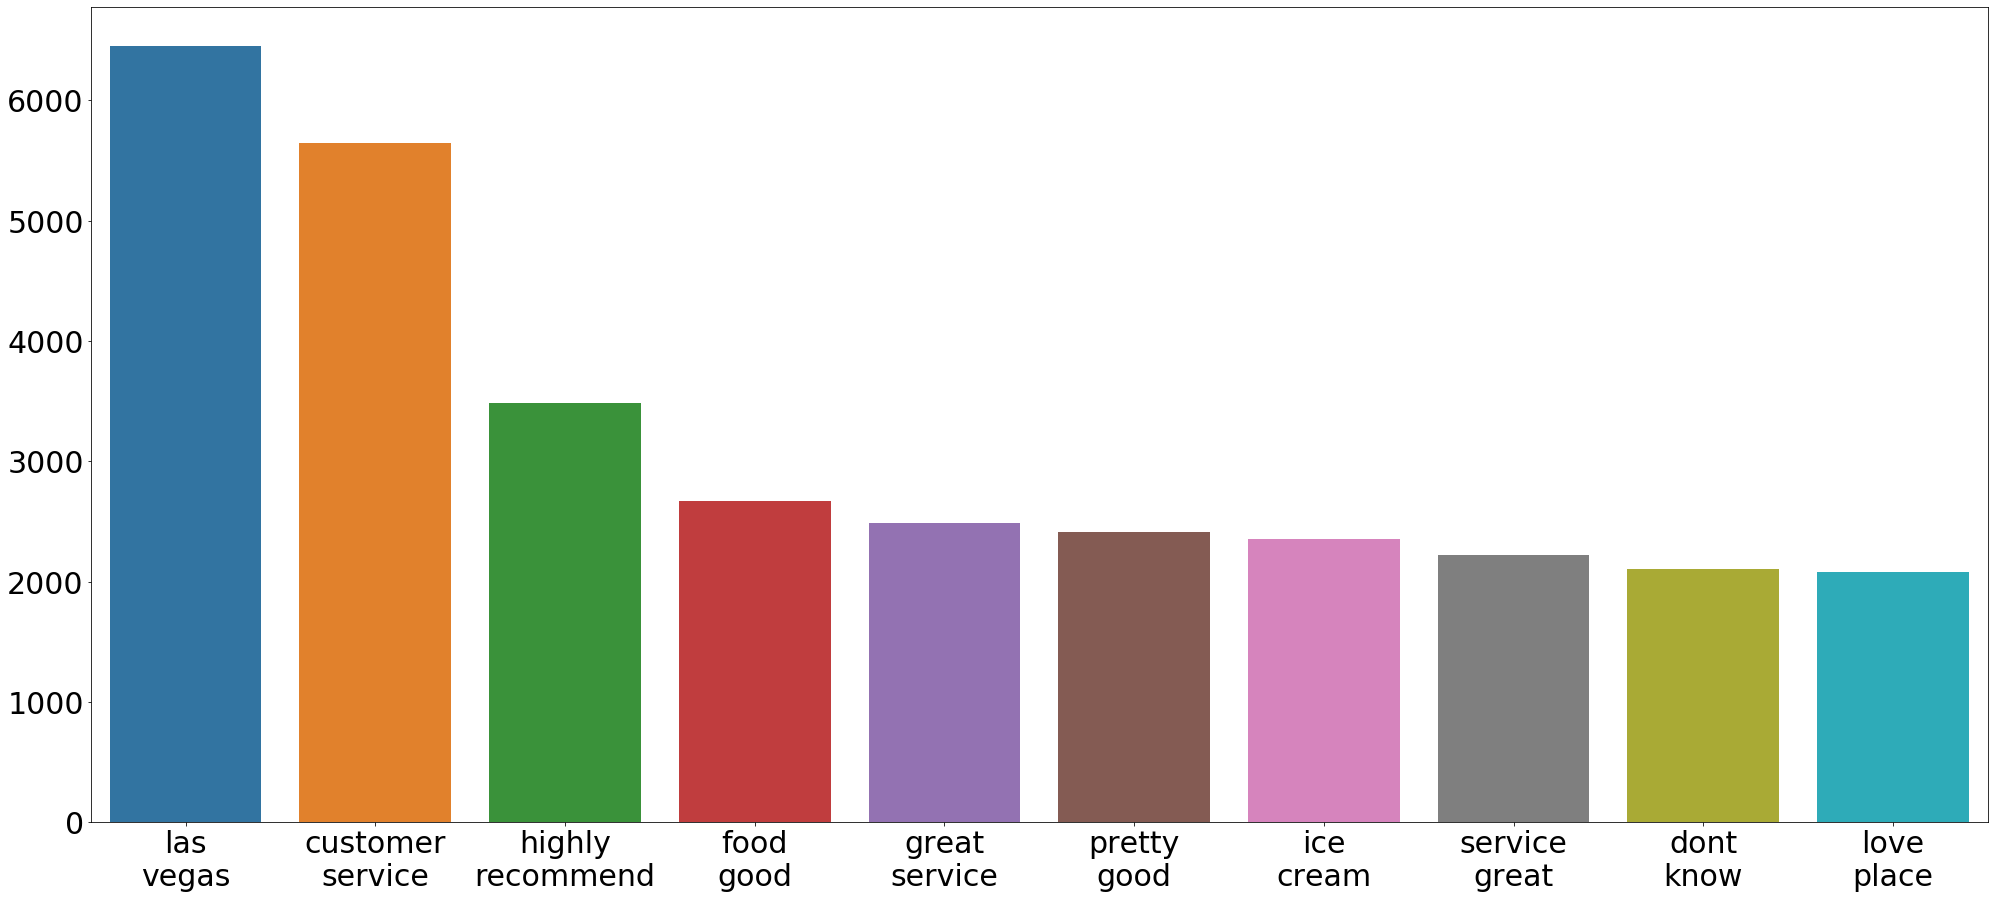

In [2]:
nv_bar = simple_bar("post_eda/eda_nv.p", 2, 10)
nv_bar.barplot()
nv_bar.count

[(('great', 'customer', 'service'), 716),
 (('food', 'great', 'service'), 433),
 (('highly', 'recommend', 'place'), 406),
 (('great', 'food', 'great'), 362),
 (('mac', 'n', 'cheese'), 352),
 (('service', 'great', 'food'), 308),
 (('food', 'good', 'service'), 279),
 (('staff', 'super', 'friendly'), 276),
 (('sweet', 'potato', 'fries'), 276),
 (('love', 'love', 'love'), 271)]

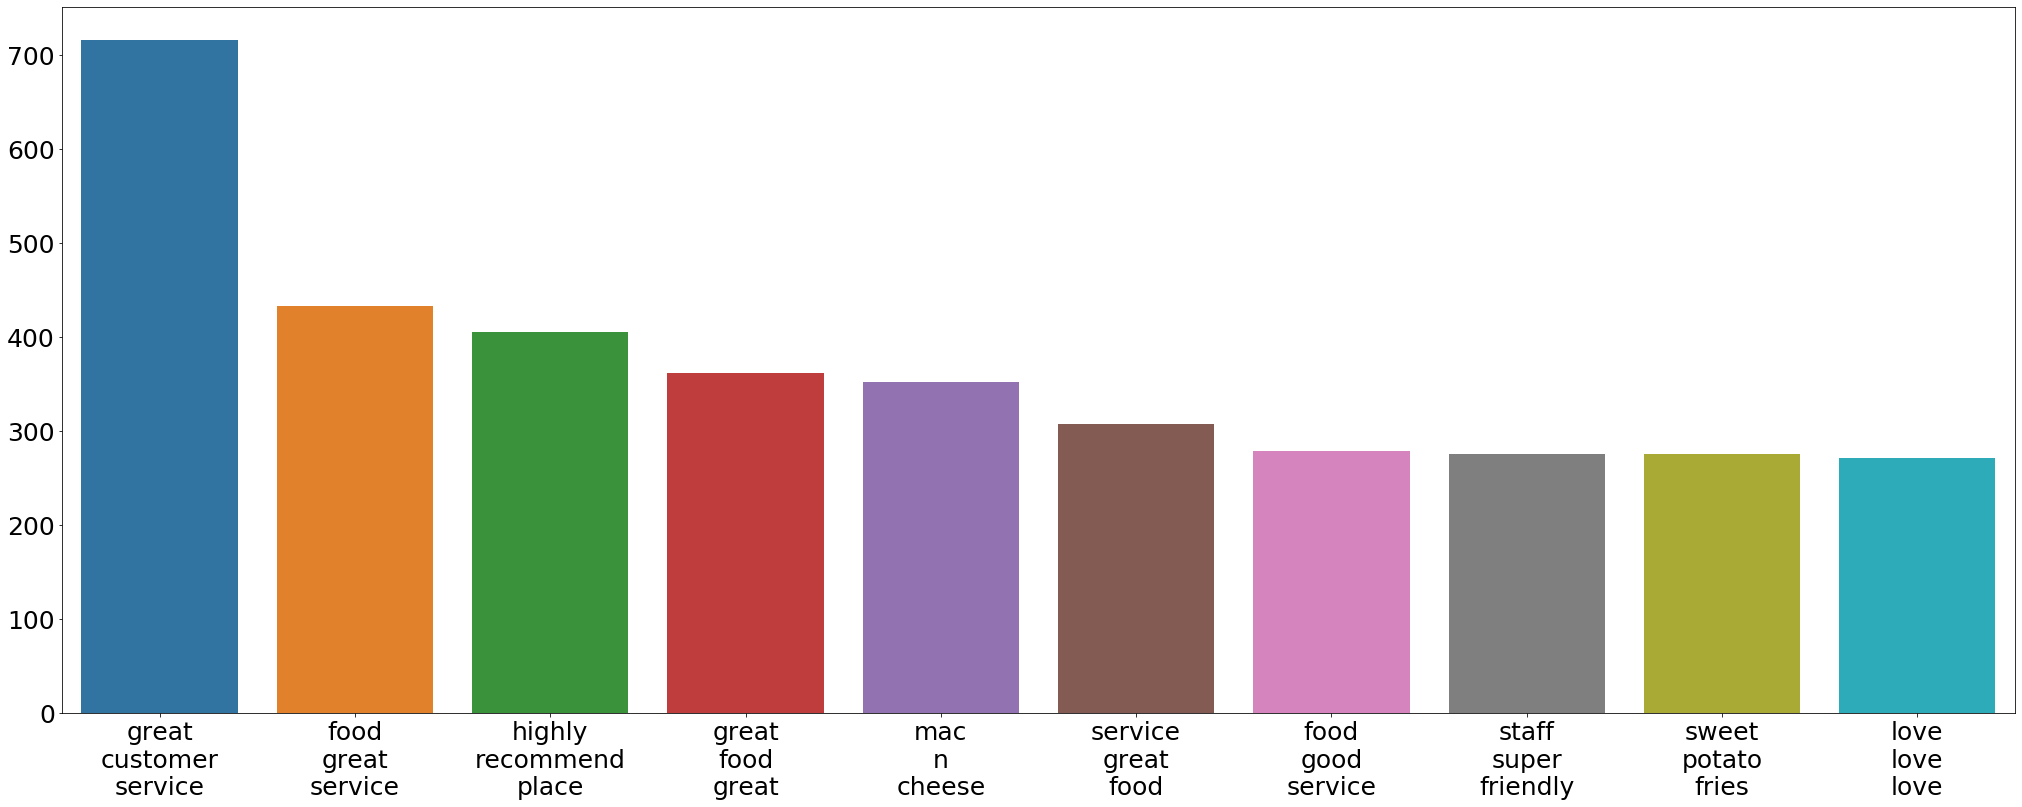

In [2]:
nv_bar = simple_bar("post_eda/eda_nv.p", 3, 10)
nv_bar.barplot()
nv_bar.count

# Arizona

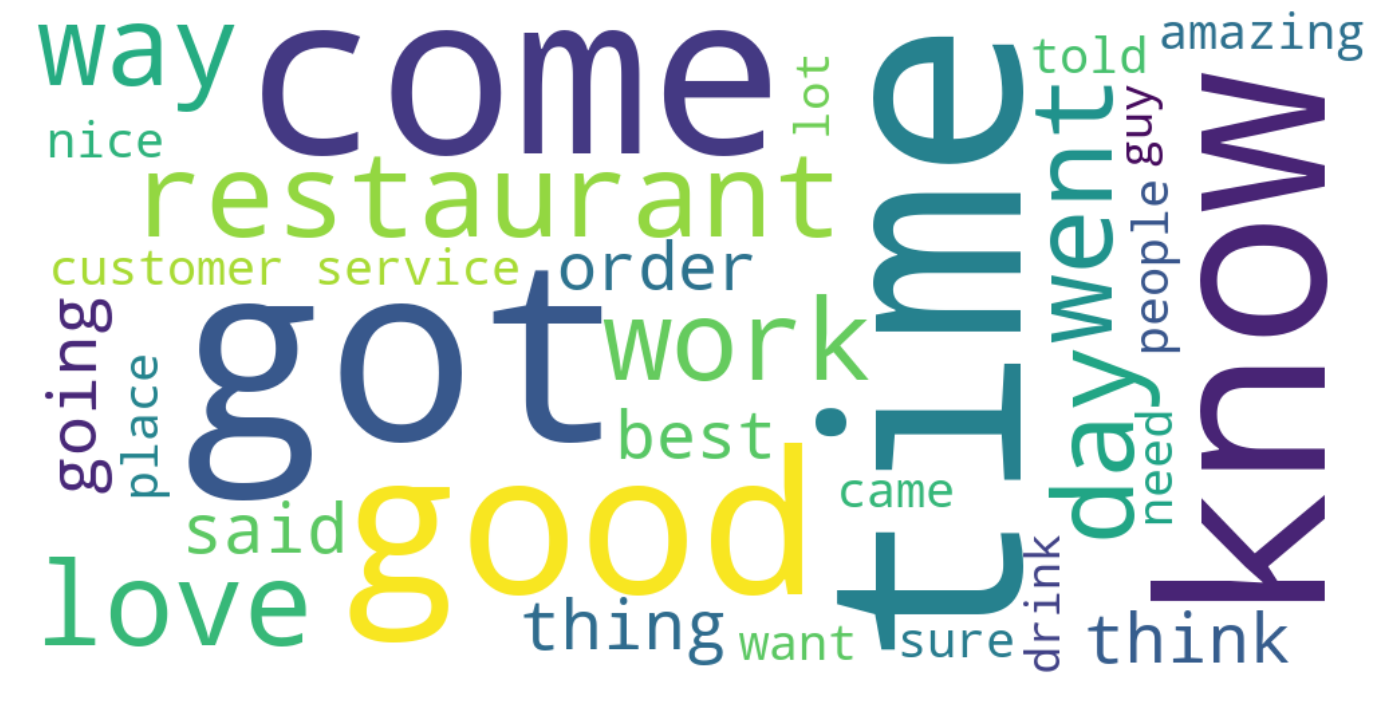

In [3]:
df_az = pickle.load(open('by_states/df_az.p', 'rb'))
df_az.text = df_az.text.apply(lambda x: clean_text_round(x))
clean_az = df_az

s_and_p(clean_az)
pickle.dump(clean_az, open('post_eda/eda_az.p', 'wb'))

wordcloud_auto(clean_az)

[(('customer', 'service'), 5771),
 (('highly', 'recommend'), 4095),
 (('happy', 'hour'), 3148),
 (('food', 'good'), 2710),
 (('great', 'service'), 2626),
 (('love', 'place'), 2336),
 (('great', 'food'), 2313),
 (('great', 'place'), 2217),
 (('staff', 'friendly'), 2212),
 (('food', 'great'), 1984)]

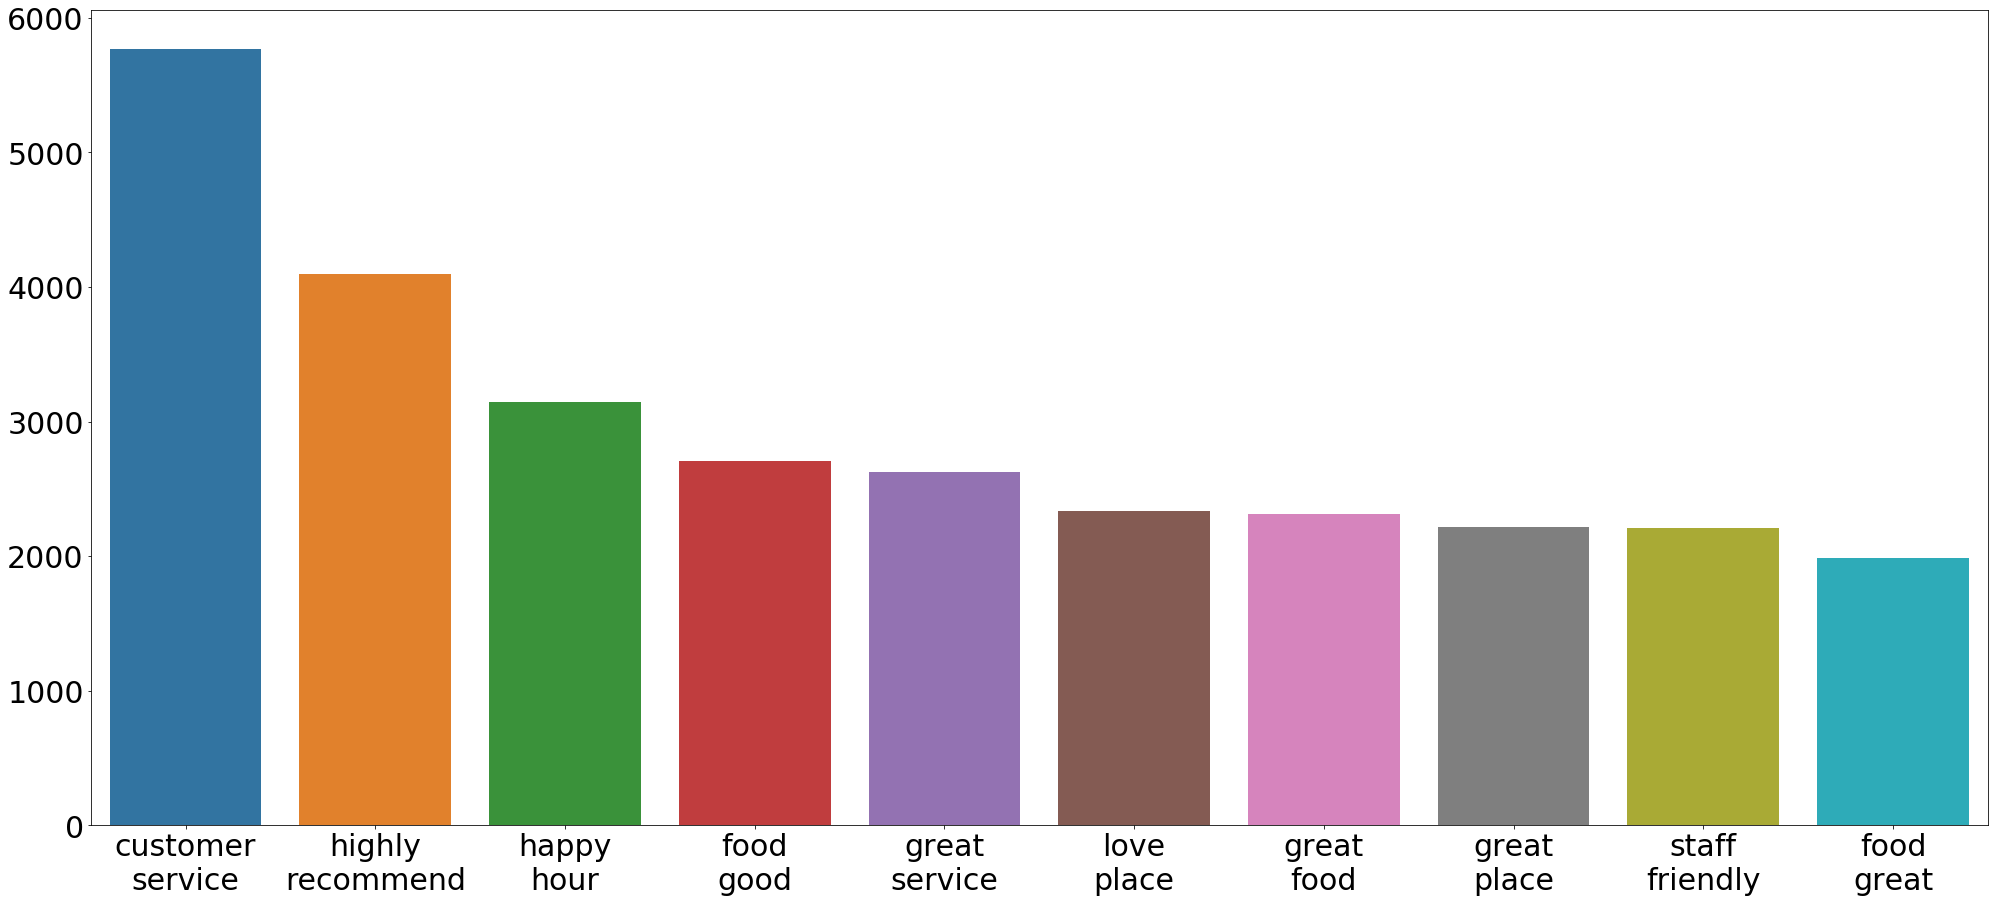

In [18]:
az_bar = simple_bar('post_eda/eda_az.p', 2, 10)
az_bar.barplot()
az_bar.count

[(('great', 'customer', 'service'), 691),
 (('food', 'great', 'service'), 411),
 (('highly', 'recommend', 'place'), 369),
 (('great', 'food', 'great'), 359),
 (('food', 'good', 'service'), 324),
 (('service', 'great', 'food'), 280),
 (('sweet', 'potato', 'fries'), 280),
 (('staff', 'super', 'friendly'), 278),
 (('love', 'love', 'love'), 270),
 (('mac', 'n', 'cheese'), 248)]

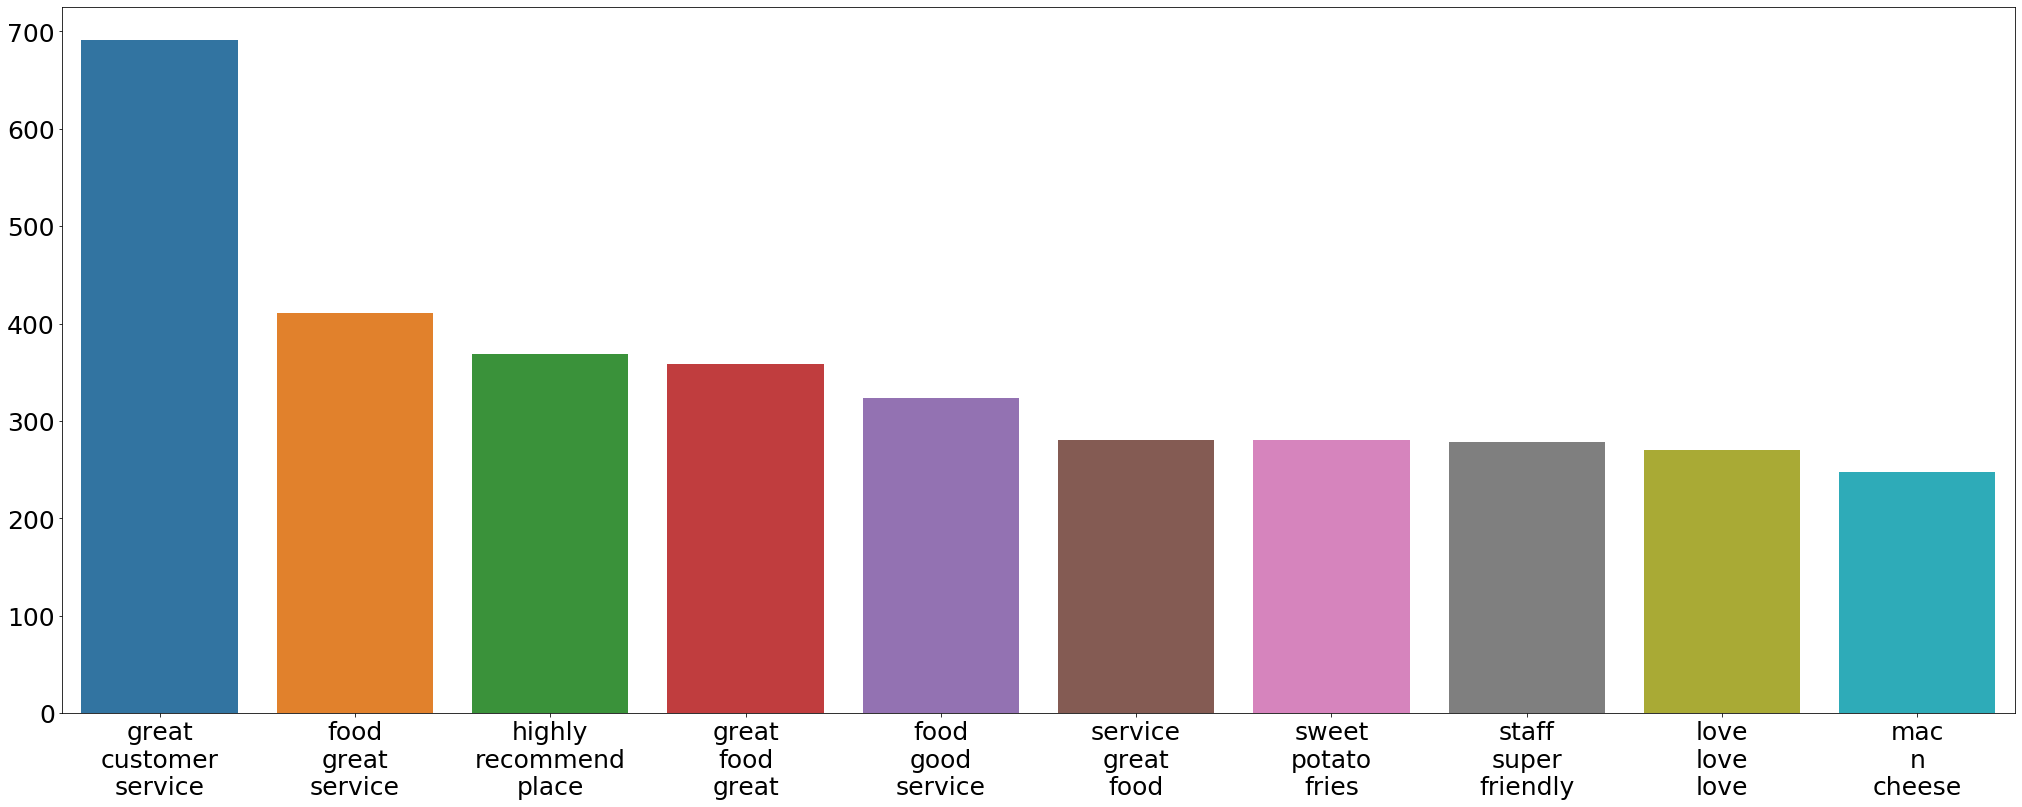

In [3]:
az_bar = simple_bar('post_eda/eda_az.p', 3, 10)
az_bar.barplot()
az_bar.count

# North Carolina

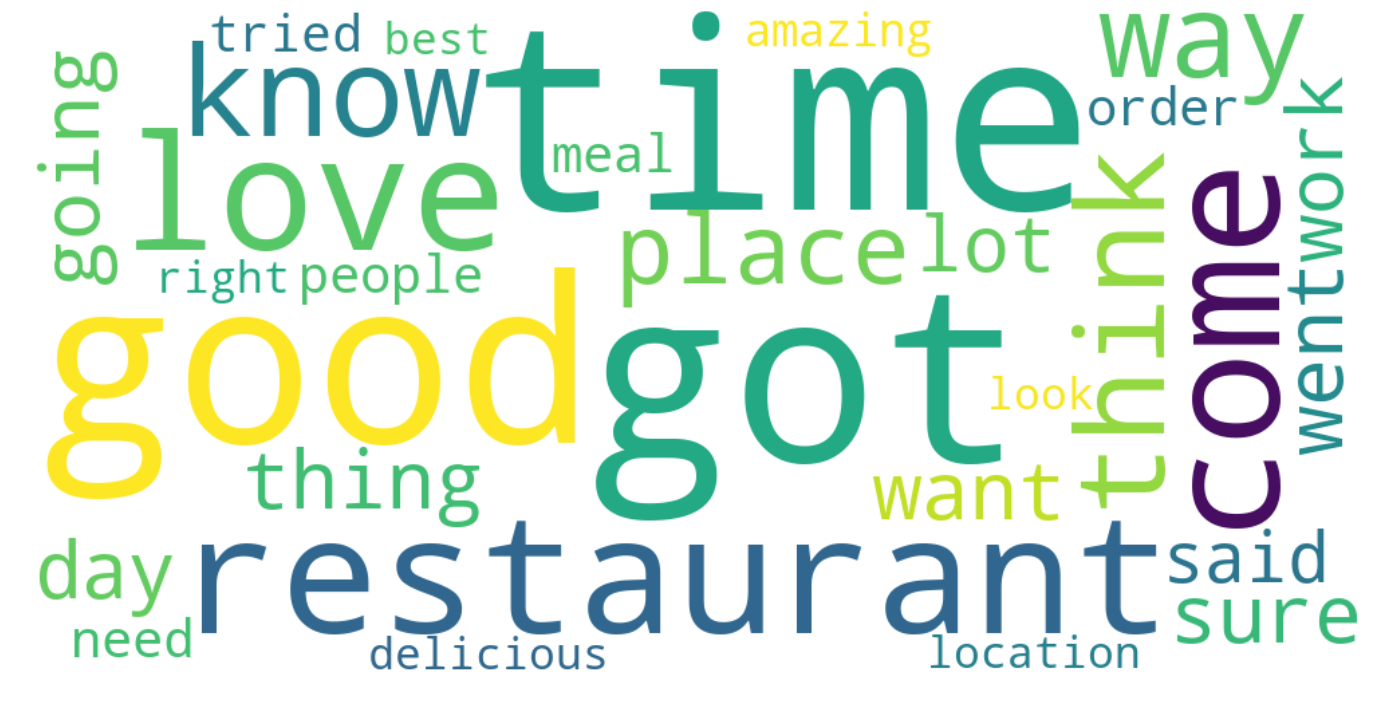

In [4]:
df_nc = pickle.load(open('by_states/df_nc.p', 'rb'))
df_nc.text = df_nc.text.apply(lambda x: clean_text_round(x))
clean_nc = df_nc

s_and_p(clean_nc)
pickle.dump(clean_nc, open('post_eda/eda_nc.p', 'wb'))

wordcloud_auto(clean_nc)

[(('customer', 'service'), 4460),
 (('food', 'good'), 3334),
 (('highly', 'recommend'), 3075),
 (('pretty', 'good'), 2633),
 (('great', 'place'), 2487),
 (('great', 'food'), 2322),
 (('staff', 'friendly'), 2285),
 (('great', 'service'), 2282),
 (('food', 'great'), 2260),
 (('good', 'food'), 2249)]

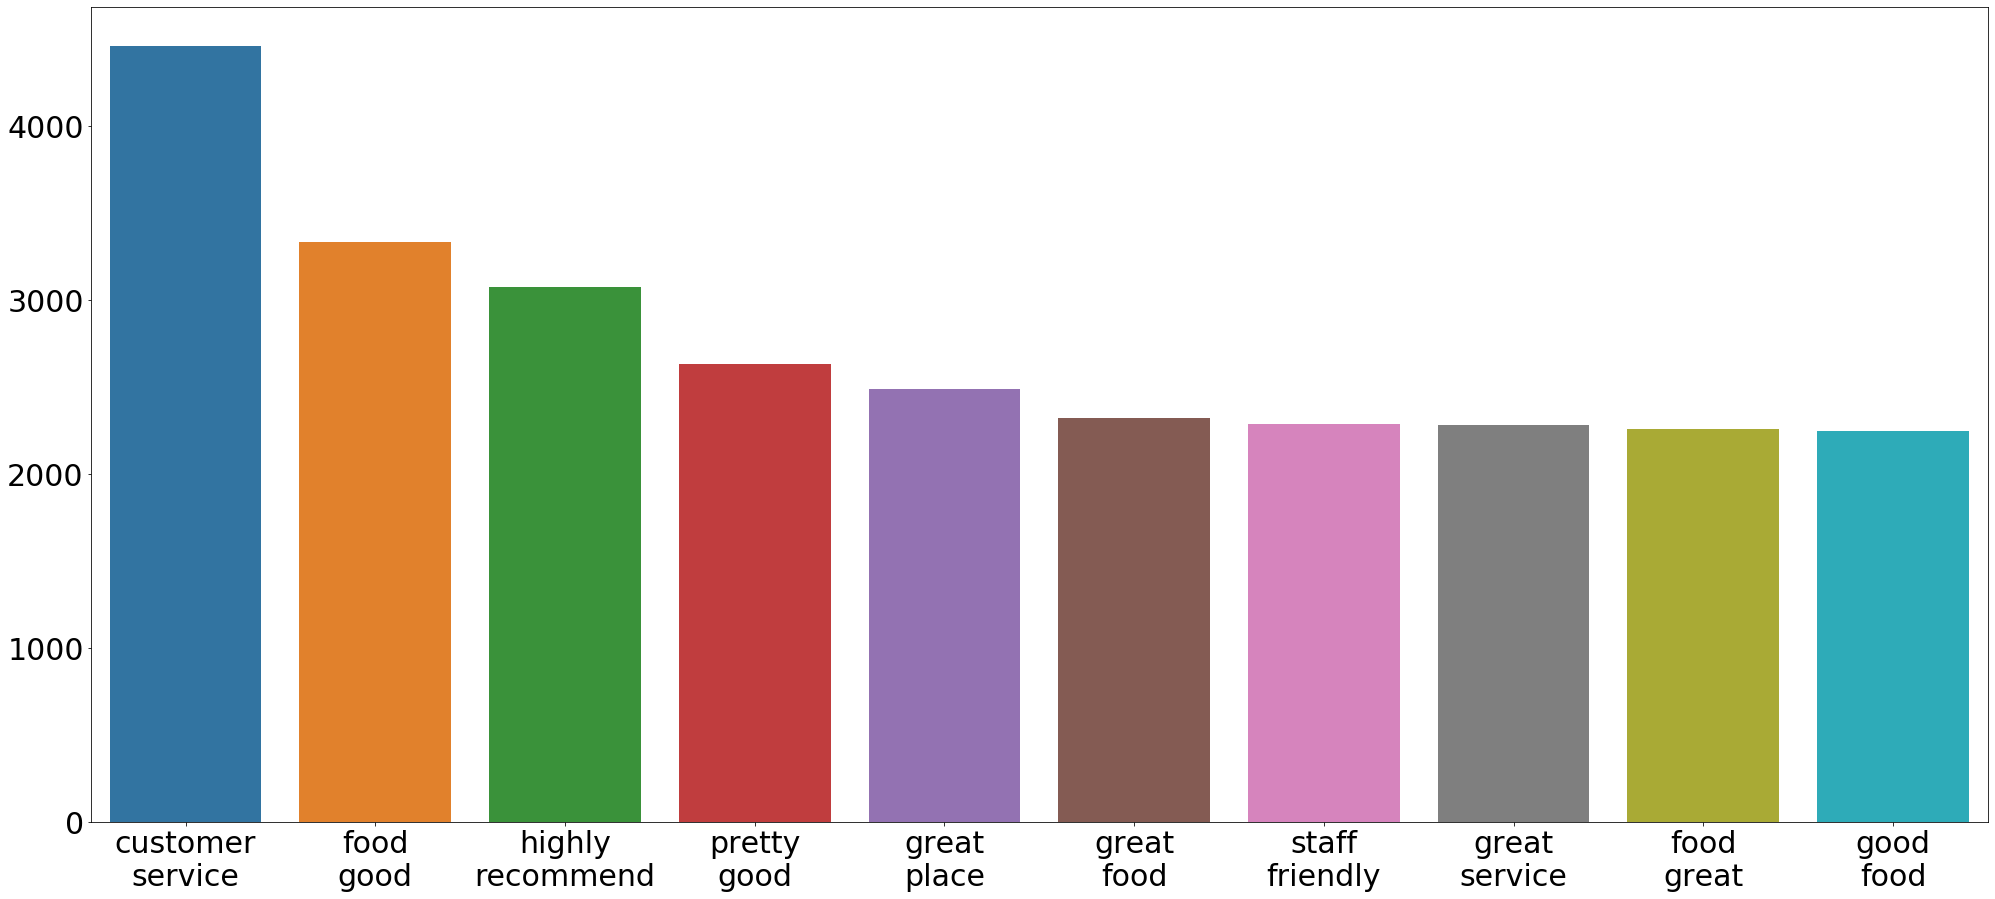

In [20]:
nc_bar = simple_bar('post_eda/eda_nc.p', 2, 10)
nc_bar.barplot()
nc_bar.count

[(('sweet', 'potato', 'fries'), 536),
 (('mac', 'n', 'cheese'), 515),
 (('food', 'great', 'service'), 446),
 (('great', 'customer', 'service'), 439),
 (('food', 'good', 'service'), 360),
 (('great', 'food', 'great'), 354),
 (('staff', 'super', 'friendly'), 312),
 (('service', 'great', 'food'), 309),
 (('food', 'pretty', 'good'), 285),
 (('highly', 'recommend', 'place'), 277)]

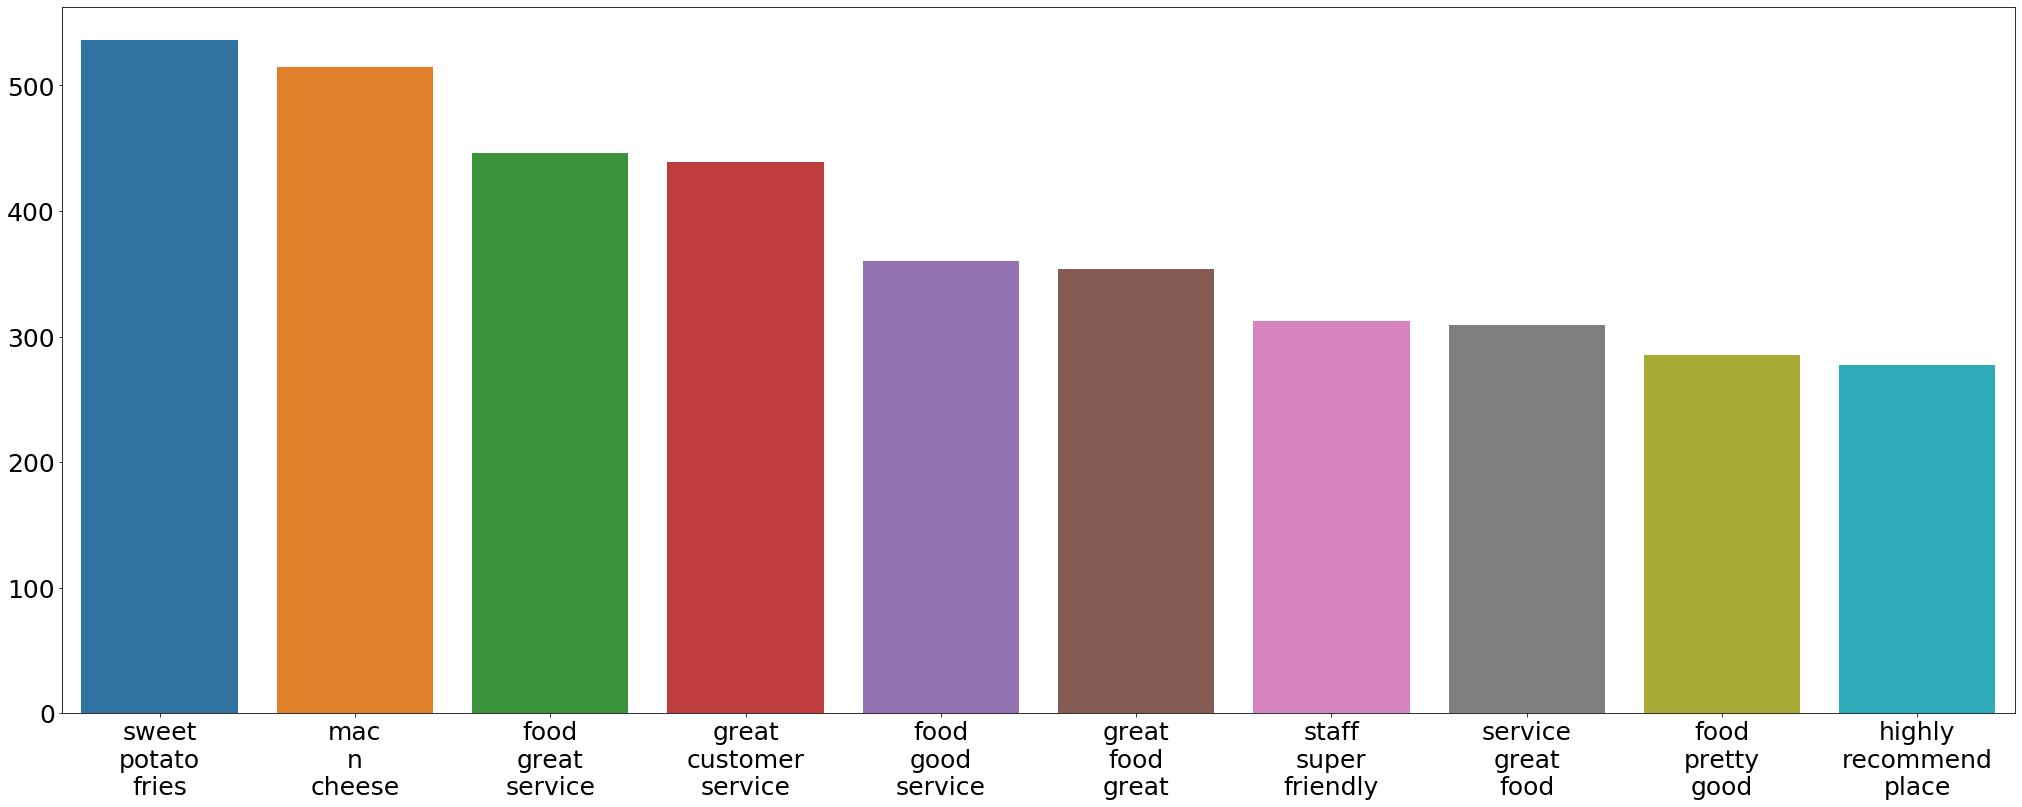

In [2]:
nc_bar = simple_bar('post_eda/eda_nc.p', 3, 10)
nc_bar.barplot()
nc_bar.count

# Ohio

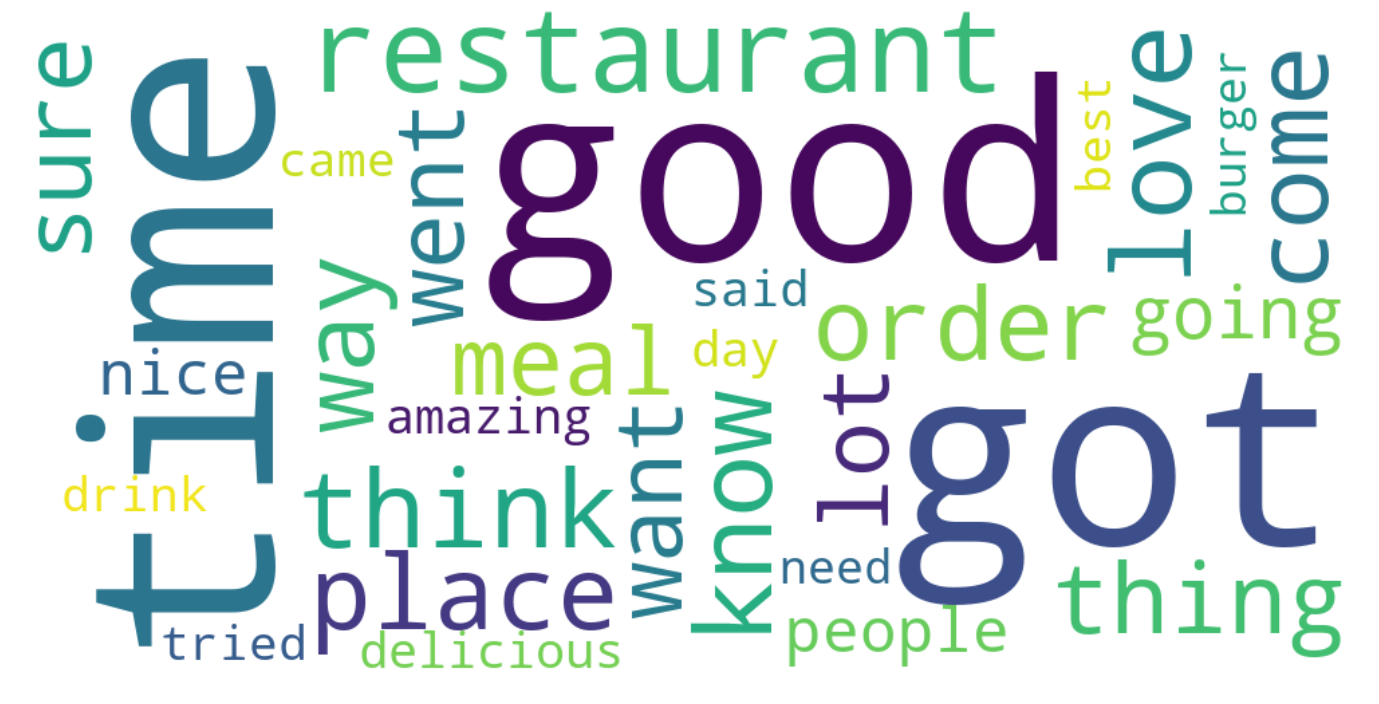

In [5]:
df_oh = pickle.load(open('by_states/df_oh.p', 'rb'))
df_oh.text = df_oh.text.apply(lambda x: clean_text_round(x))
clean_oh = df_oh

s_and_p(clean_oh)
pickle.dump(clean_oh, open('post_eda/eda_oh.p', 'wb'))

wordcloud_auto(clean_oh)

[(('food', 'good'), 3504),
 (('ice', 'cream'), 3197),
 (('customer', 'service'), 2936),
 (('highly', 'recommend'), 2917),
 (('happy', 'hour'), 2642),
 (('pretty', 'good'), 2593),
 (('great', 'place'), 2585),
 (('great', 'food'), 2554),
 (('good', 'food'), 2287),
 (('staff', 'friendly'), 2170)]

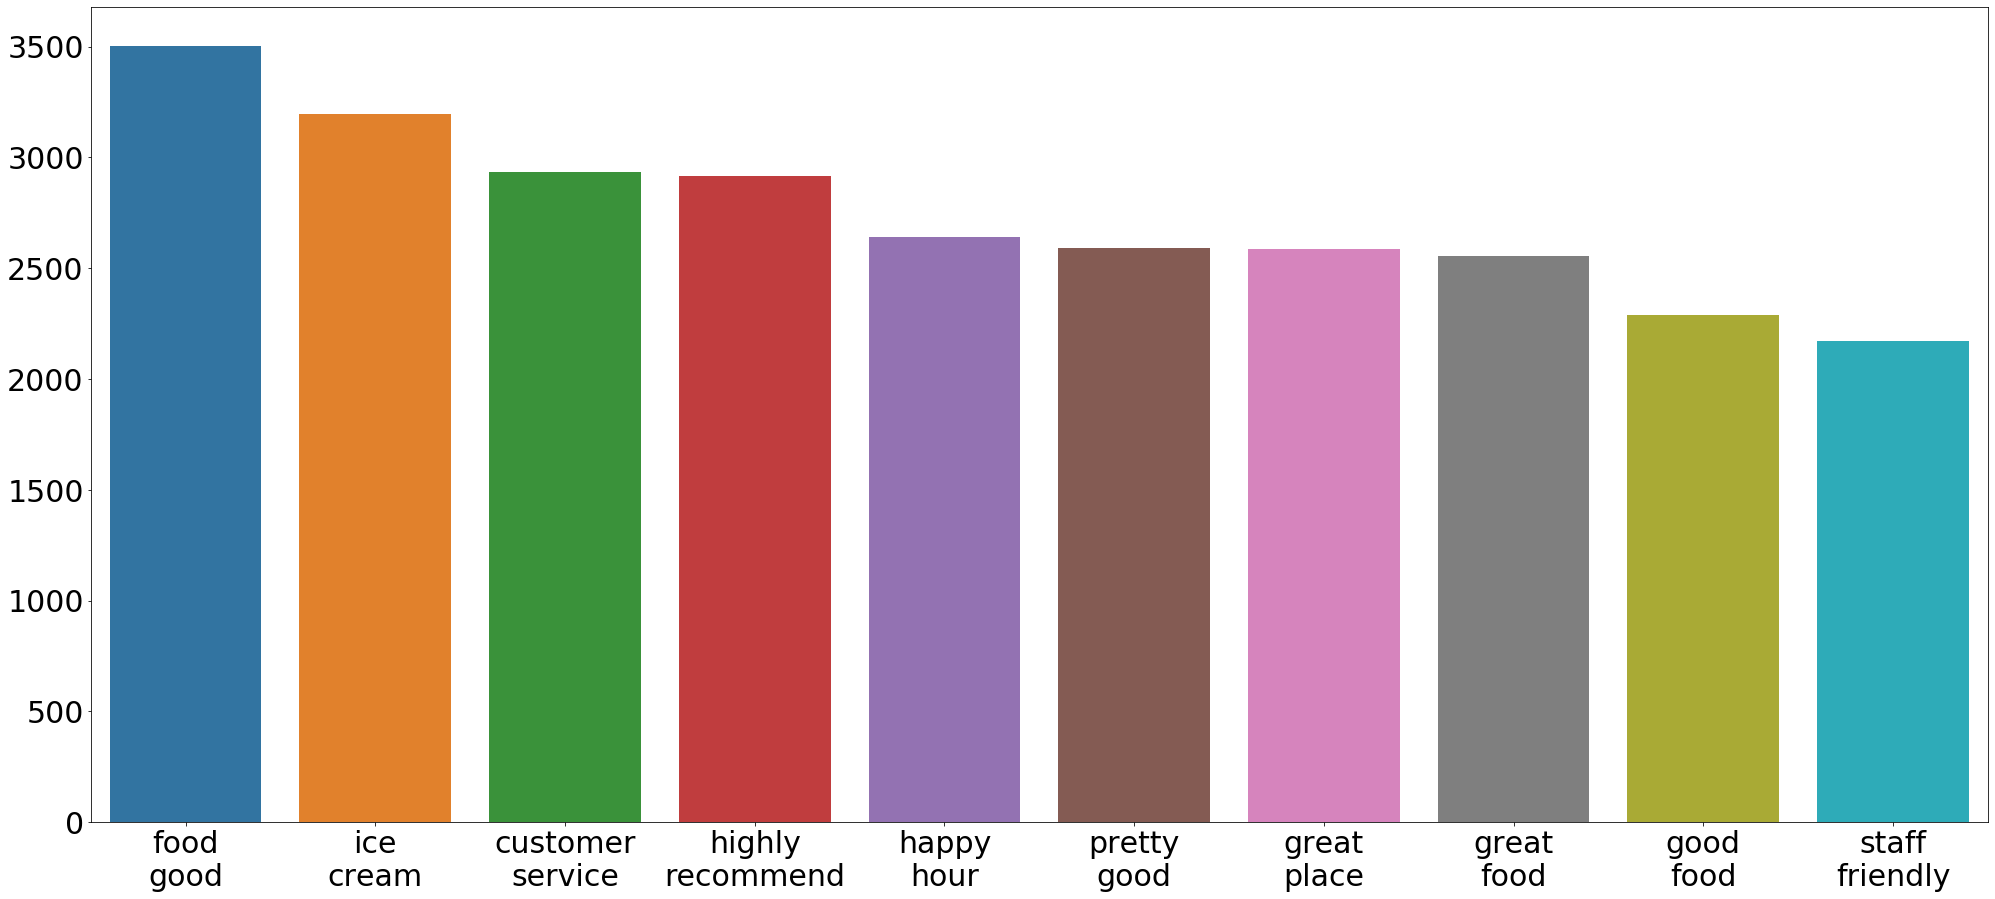

In [22]:
oh_bar = simple_bar('post_eda/eda_oh.p', 2, 10)
oh_bar.barplot()
oh_bar.count

[(('food', 'good', 'service'), 402),
 (('great', 'food', 'great'), 376),
 (('food', 'great', 'service'), 355),
 (('mac', 'n', 'cheese'), 354),
 (('sweet', 'potato', 'fries'), 333),
 (('food', 'pretty', 'good'), 293),
 (('service', 'great', 'food'), 287),
 (('highly', 'recommend', 'place'), 287),
 (('great', 'customer', 'service'), 260),
 (('seated', 'right', 'away'), 259)]

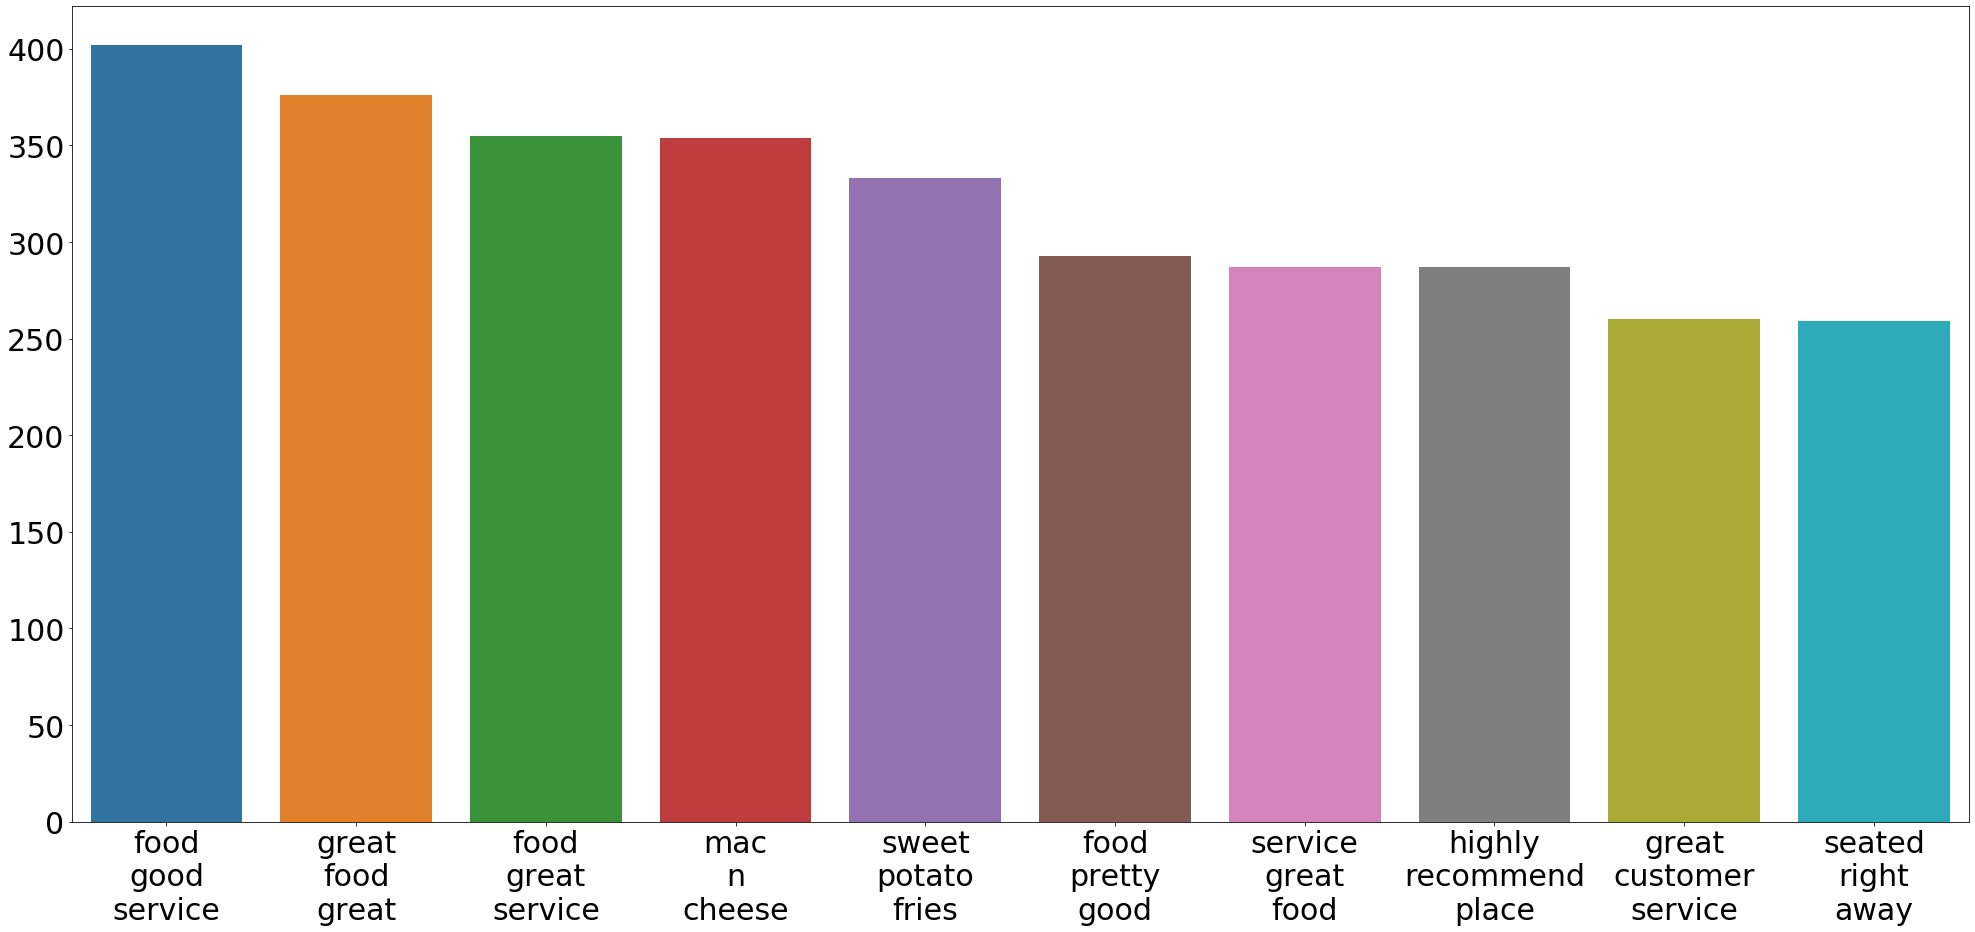

In [23]:
oh_bar = simple_bar('post_eda/eda_oh.p', 3, 10)
oh_bar.barplot()
oh_bar.count

# Ontario

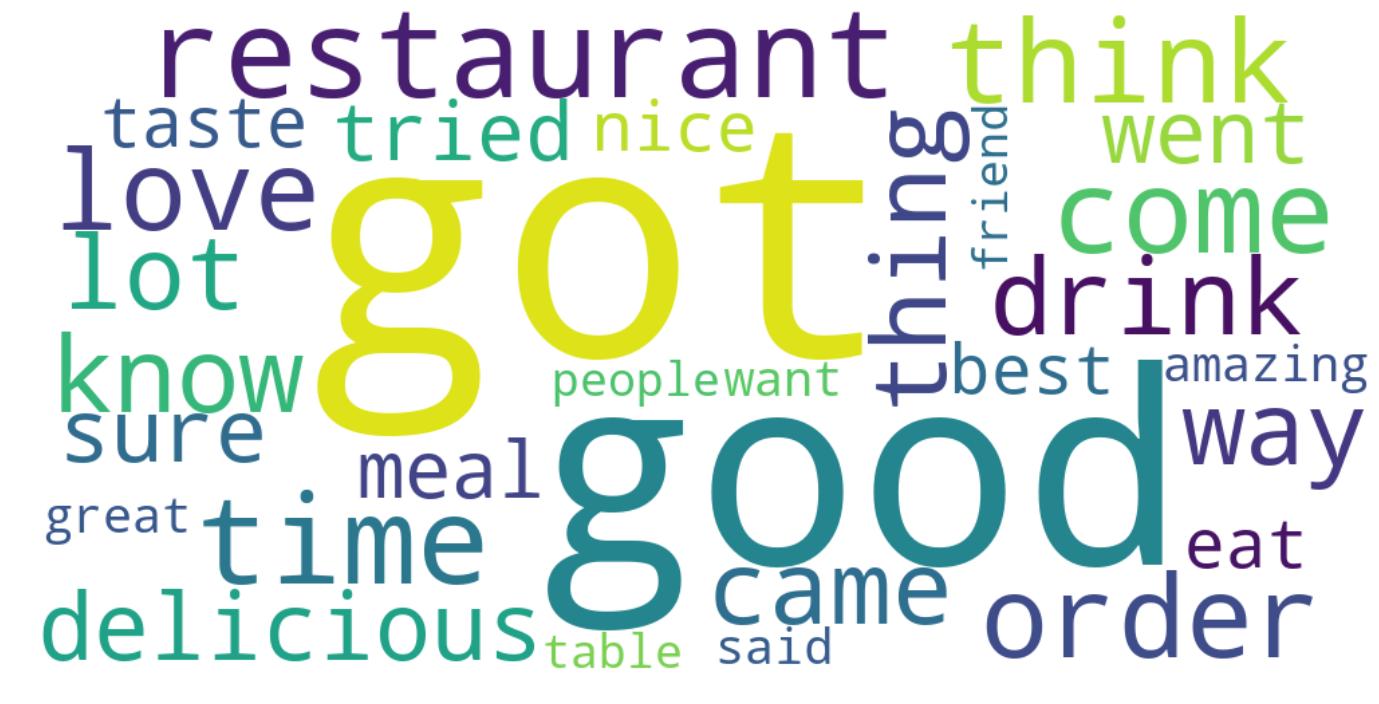

In [6]:
df_on = pickle.load(open('by_states/df_on.p', 'rb'))
df_on.text = df_on.text.apply(lambda x: clean_text_round(x))
clean_on = df_on

s_and_p(clean_on)
pickle.dump(clean_on, open('post_eda/eda_on.p', 'wb'))

wordcloud_auto(clean_on)

[(('ice', 'cream'), 4689),
 (('pretty', 'good'), 3568),
 (('food', 'good'), 3169),
 (('customer', 'service'), 3164),
 (('highly', 'recommend'), 2539),
 (('great', 'place'), 2375),
 (('dont', 'know'), 2199),
 (('staff', 'friendly'), 2141),
 (('service', 'good'), 2042),
 (('good', 'food'), 2008)]

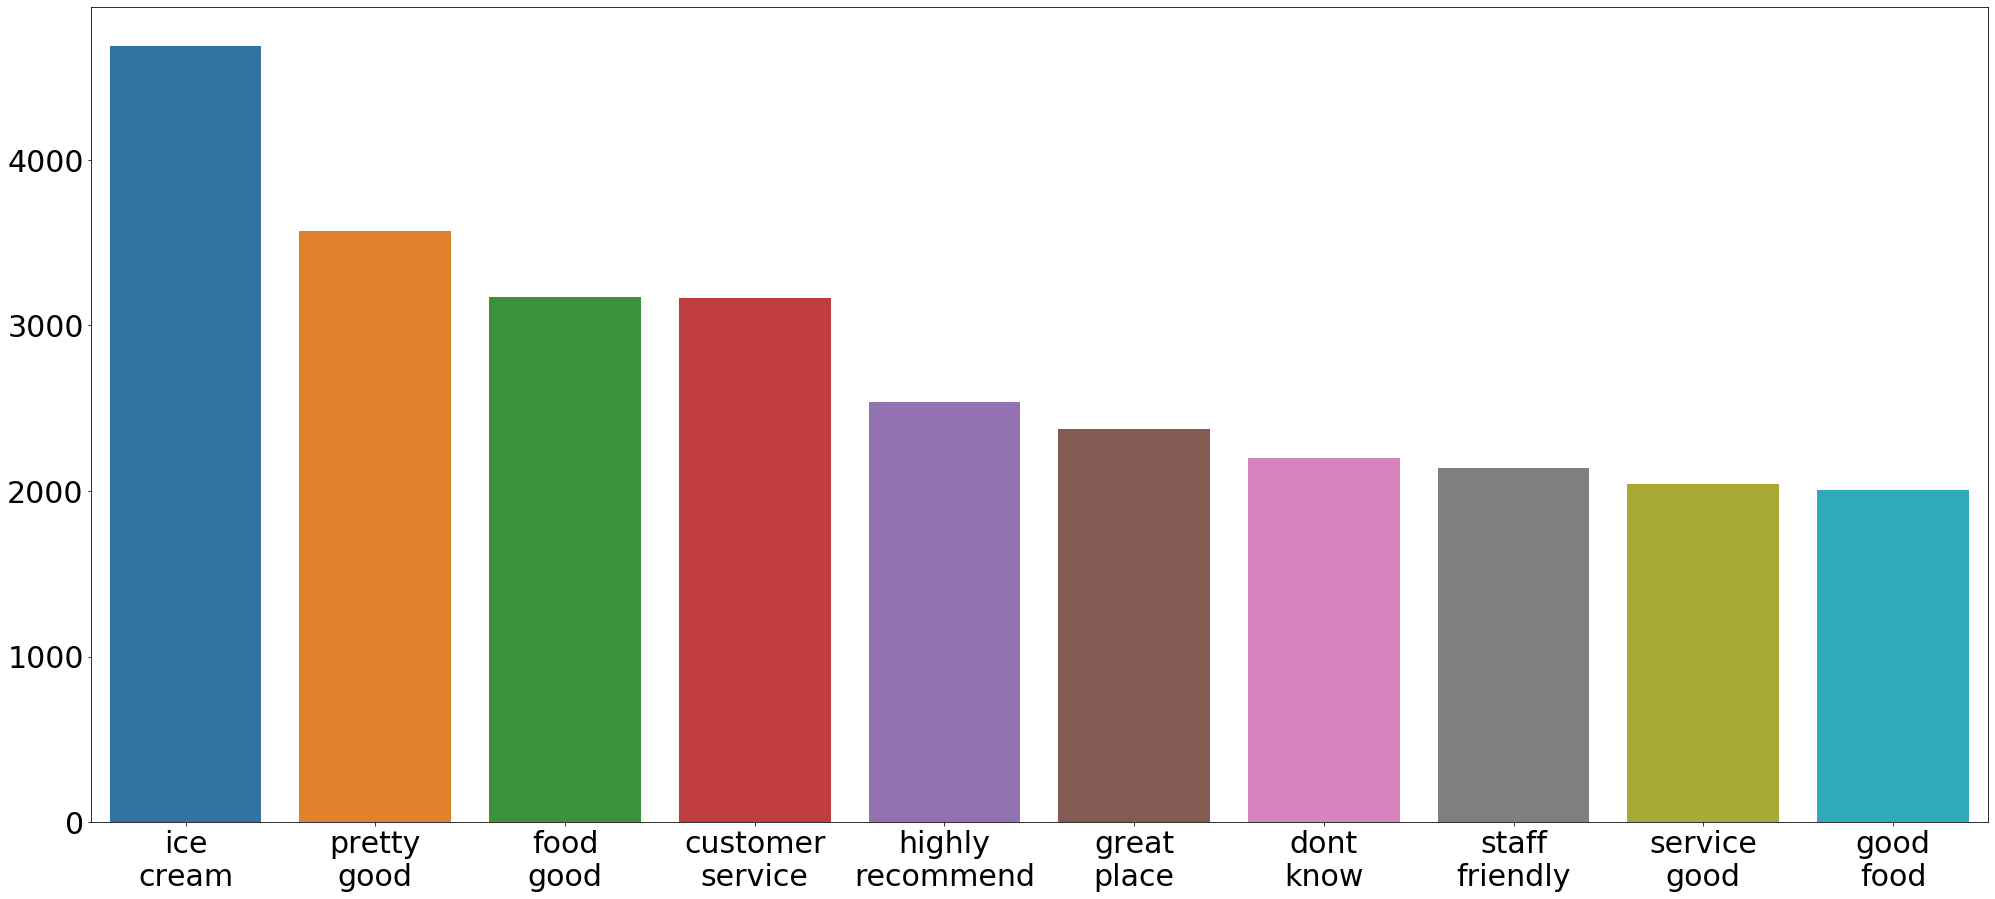

In [24]:
on_bar = simple_bar('post_eda/eda_on.p', 2, 10)
on_bar.barplot()
on_bar.count

[(('sweet', 'potato', 'fries'), 404),
 (('food', 'pretty', 'good'), 353),
 (('highly', 'recommend', 'place'), 351),
 (('pork', 'bone', 'soup'), 315),
 (('food', 'good', 'service'), 298),
 (('definitely', 'recommend', 'place'), 297),
 (('food', 'great', 'service'), 295),
 (('staff', 'super', 'friendly'), 274),
 (('service', 'good', 'food'), 249),
 (('seated', 'right', 'away'), 248)]

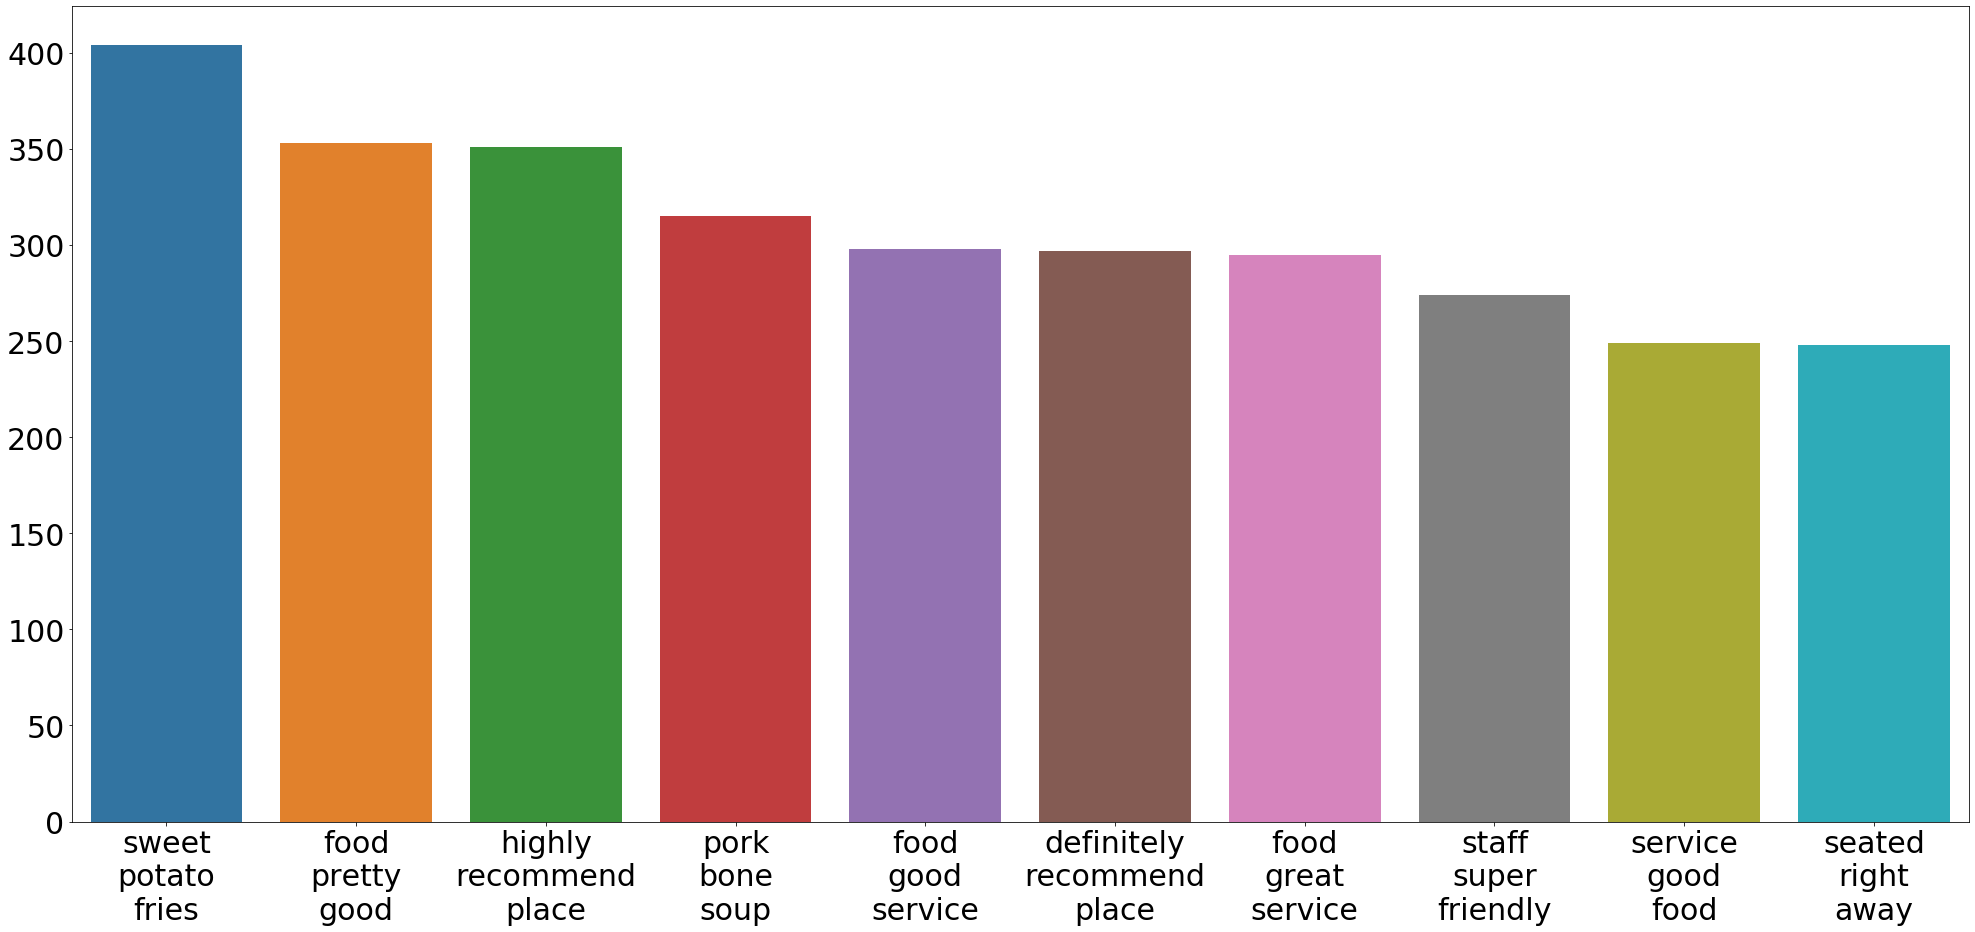

In [25]:
on_bar = simple_bar('post_eda/eda_on.p', 3, 10)
on_bar.barplot()
on_bar.count

# Pennsylvania

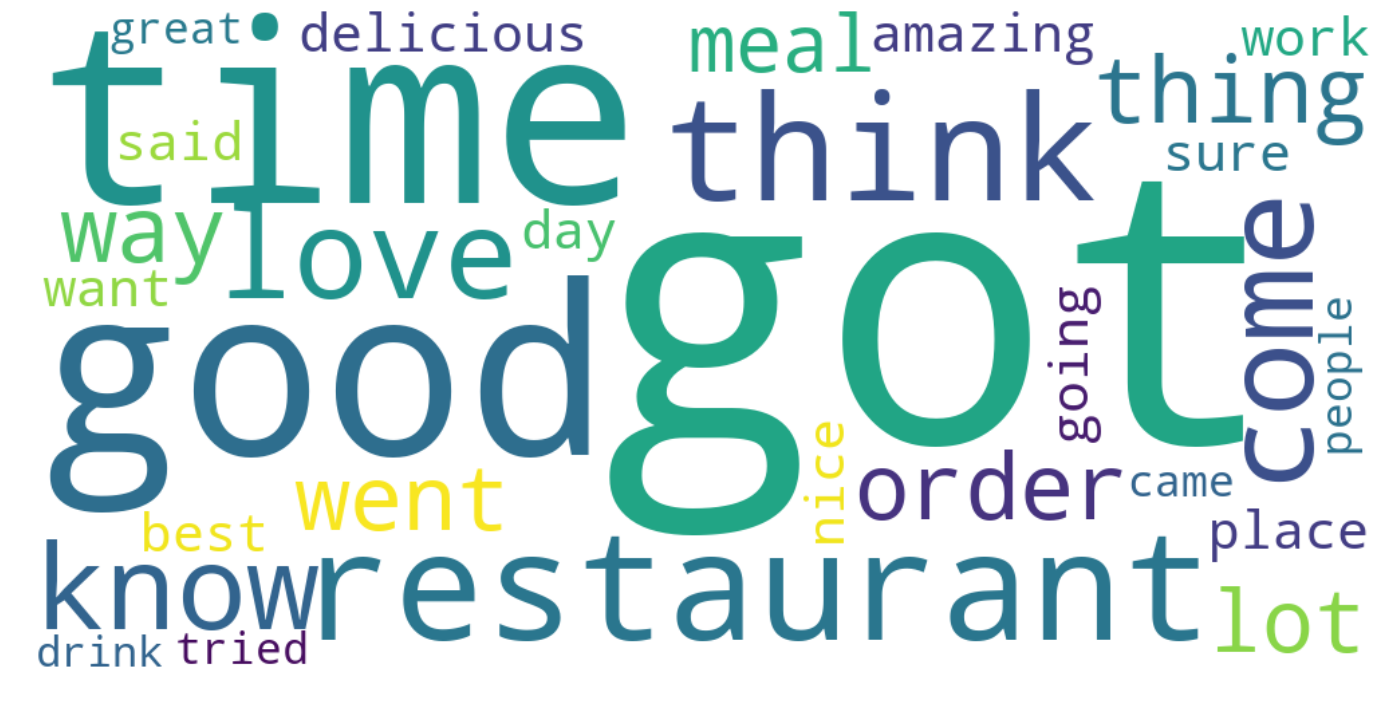

In [7]:
df_pa = pickle.load(open('by_states/df_pa.p', 'rb'))
df_pa.text = df_pa.text.apply(lambda x: clean_text_round(x))
clean_pa = df_pa

s_and_p(clean_pa)
pickle.dump(clean_pa, open('post_eda/eda_pa.p', 'wb'))

wordcloud_auto(clean_pa)

[(('food', 'good'), 3354),
 (('highly', 'recommend'), 3290),
 (('ice', 'cream'), 3176),
 (('pretty', 'good'), 2754),
 (('great', 'place'), 2469),
 (('customer', 'service'), 2410),
 (('happy', 'hour'), 2362),
 (('great', 'food'), 2180),
 (('dont', 'know'), 2124),
 (('staff', 'friendly'), 2123)]

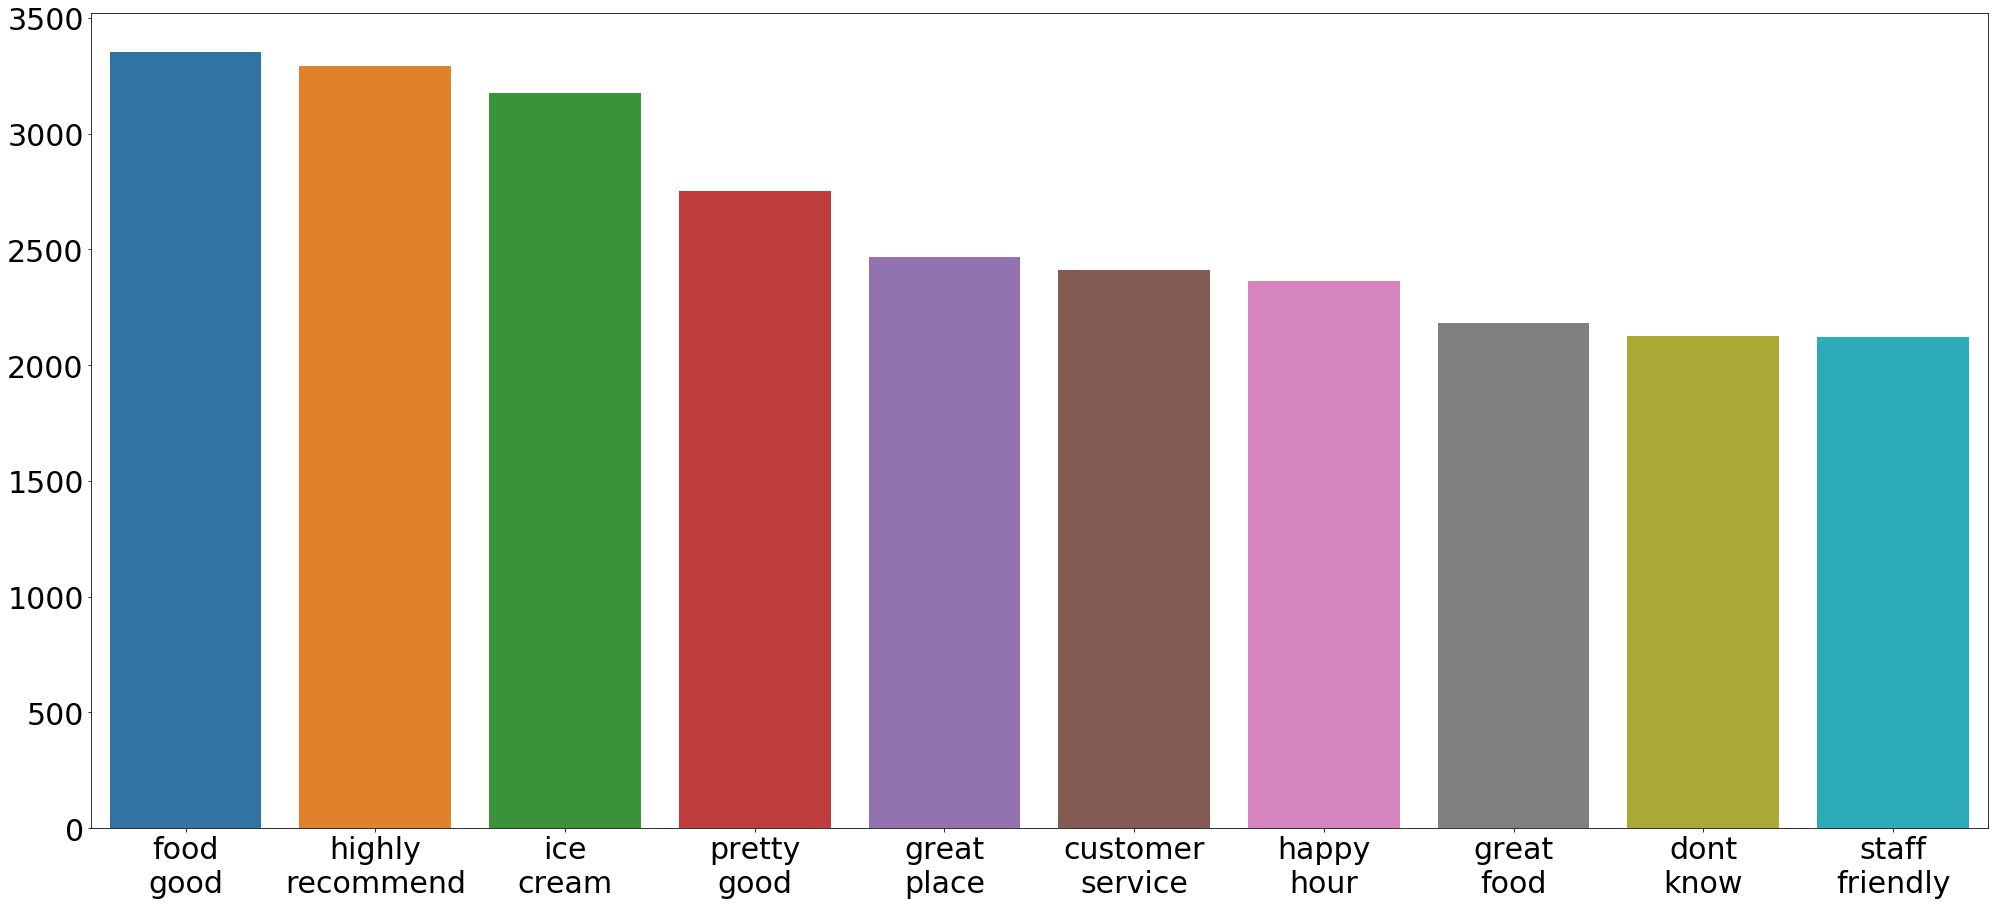

In [26]:
bar_pa = simple_bar('post_eda/eda_pa.p', 2, 10)
bar_pa.barplot()
bar_pa.count

[(('mac', 'n', 'cheese'), 494),
 (('sweet', 'potato', 'fries'), 391),
 (('food', 'great', 'service'), 371),
 (('food', 'good', 'service'), 309),
 (('great', 'food', 'great'), 308),
 (('highly', 'recommend', 'place'), 308),
 (('food', 'pretty', 'good'), 285),
 (('staff', 'friendly', 'helpful'), 249),
 (('service', 'great', 'food'), 246),
 (('staff', 'super', 'friendly'), 244)]

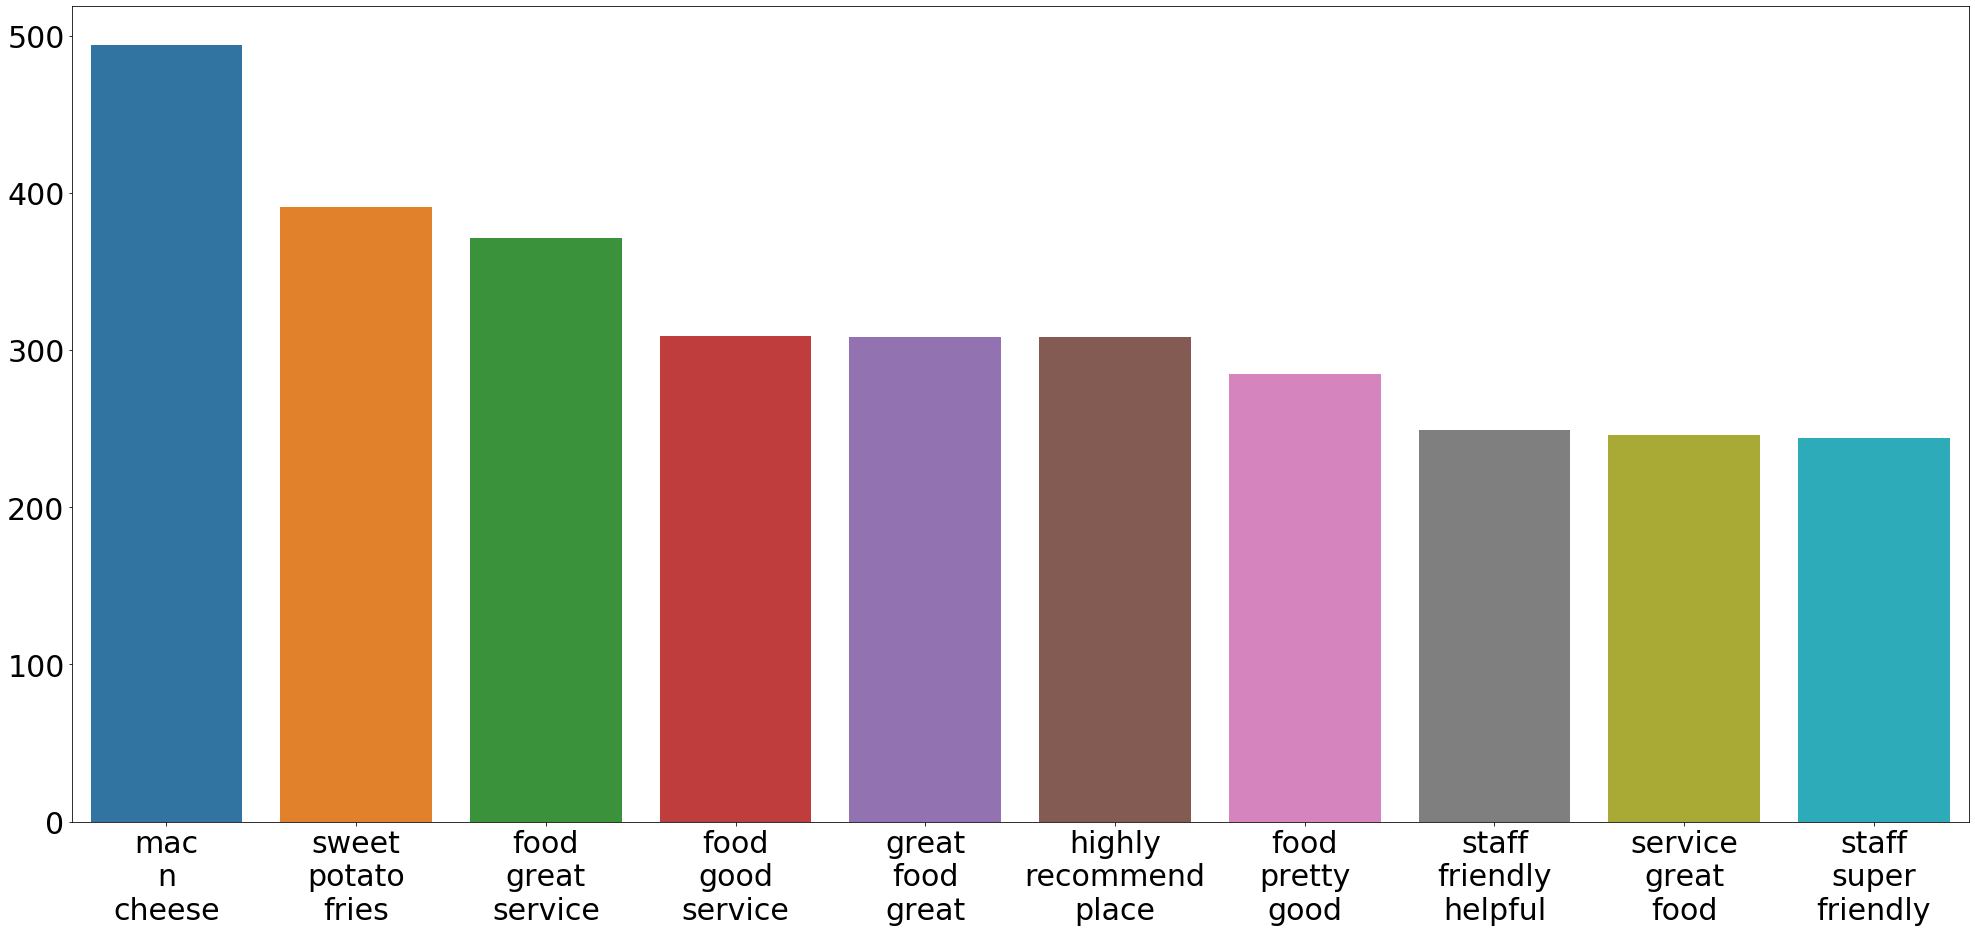

In [27]:
bar_pa = simple_bar('post_eda/eda_pa.p', 3, 10)
bar_pa.barplot()
bar_pa.count

# Quebec

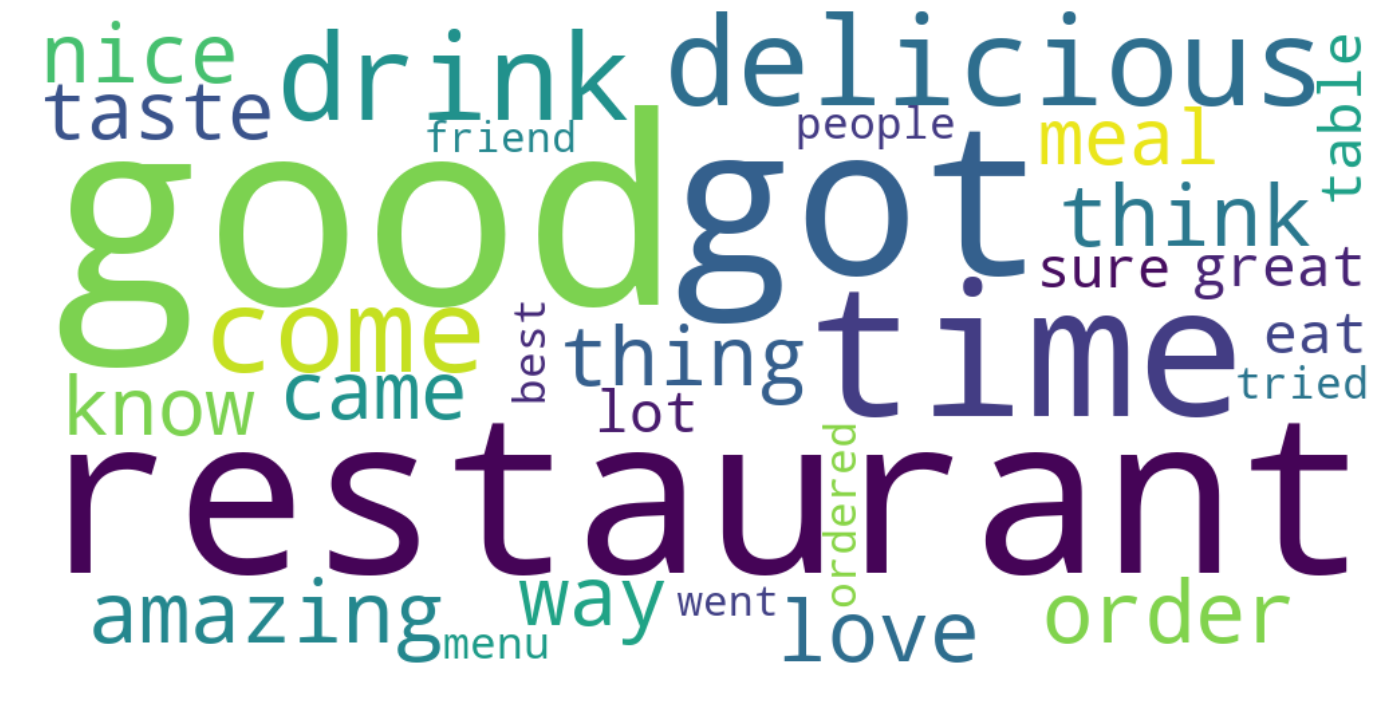

In [8]:
df_qc = pickle.load(open('by_states/df_qc.p', 'rb'))
df_qc.text = df_qc.text.apply(lambda x: clean_text_round(x))
clean_qc = df_qc

s_and_p(clean_qc)
pickle.dump(clean_qc, open('post_eda/eda_qc.p', 'wb'))

wordcloud_auto(clean_qc)

[(('smoked', 'meat'), 3043),
 (('food', 'good'), 2769),
 (('ice', 'cream'), 2754),
 (('highly', 'recommend'), 2359),
 (('pretty', 'good'), 2191),
 (('great', 'place'), 2178),
 (('foie', 'gras'), 1983),
 (('good', 'food'), 1758),
 (('staff', 'friendly'), 1716),
 (('great', 'service'), 1705)]

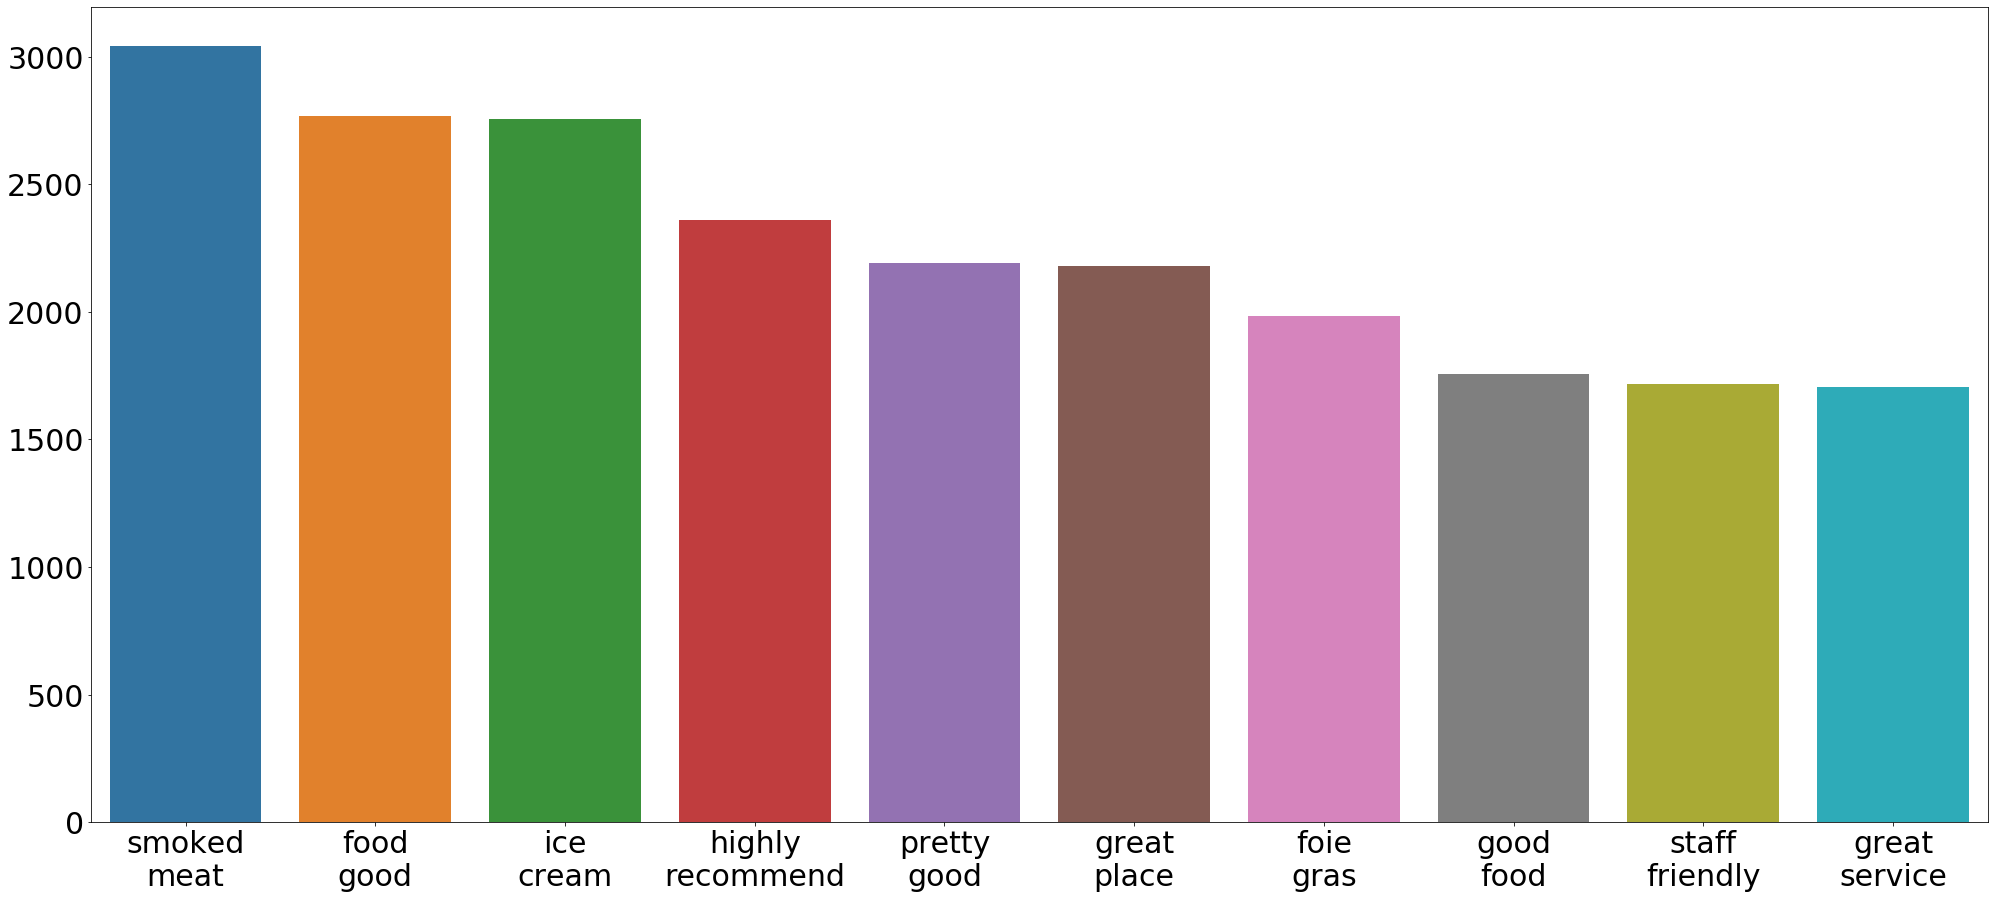

In [28]:
bar_qc = simple_bar('post_eda/eda_qc.p', 2, 10)
bar_qc.barplot()
bar_qc.count

[(('smoked', 'meat', 'sandwich'), 731),
 (('french', 'onion', 'soup'), 365),
 (('highly', 'recommend', 'place'), 327),
 (('food', 'good', 'service'), 287),
 (('staff', 'super', 'friendly'), 280),
 (('food', 'great', 'service'), 279),
 (('mac', 'n', 'cheese'), 274),
 (('definitely', 'recommend', 'place'), 253),
 (('time', 'im', 'montreal'), 231),
 (('seated', 'right', 'away'), 224)]

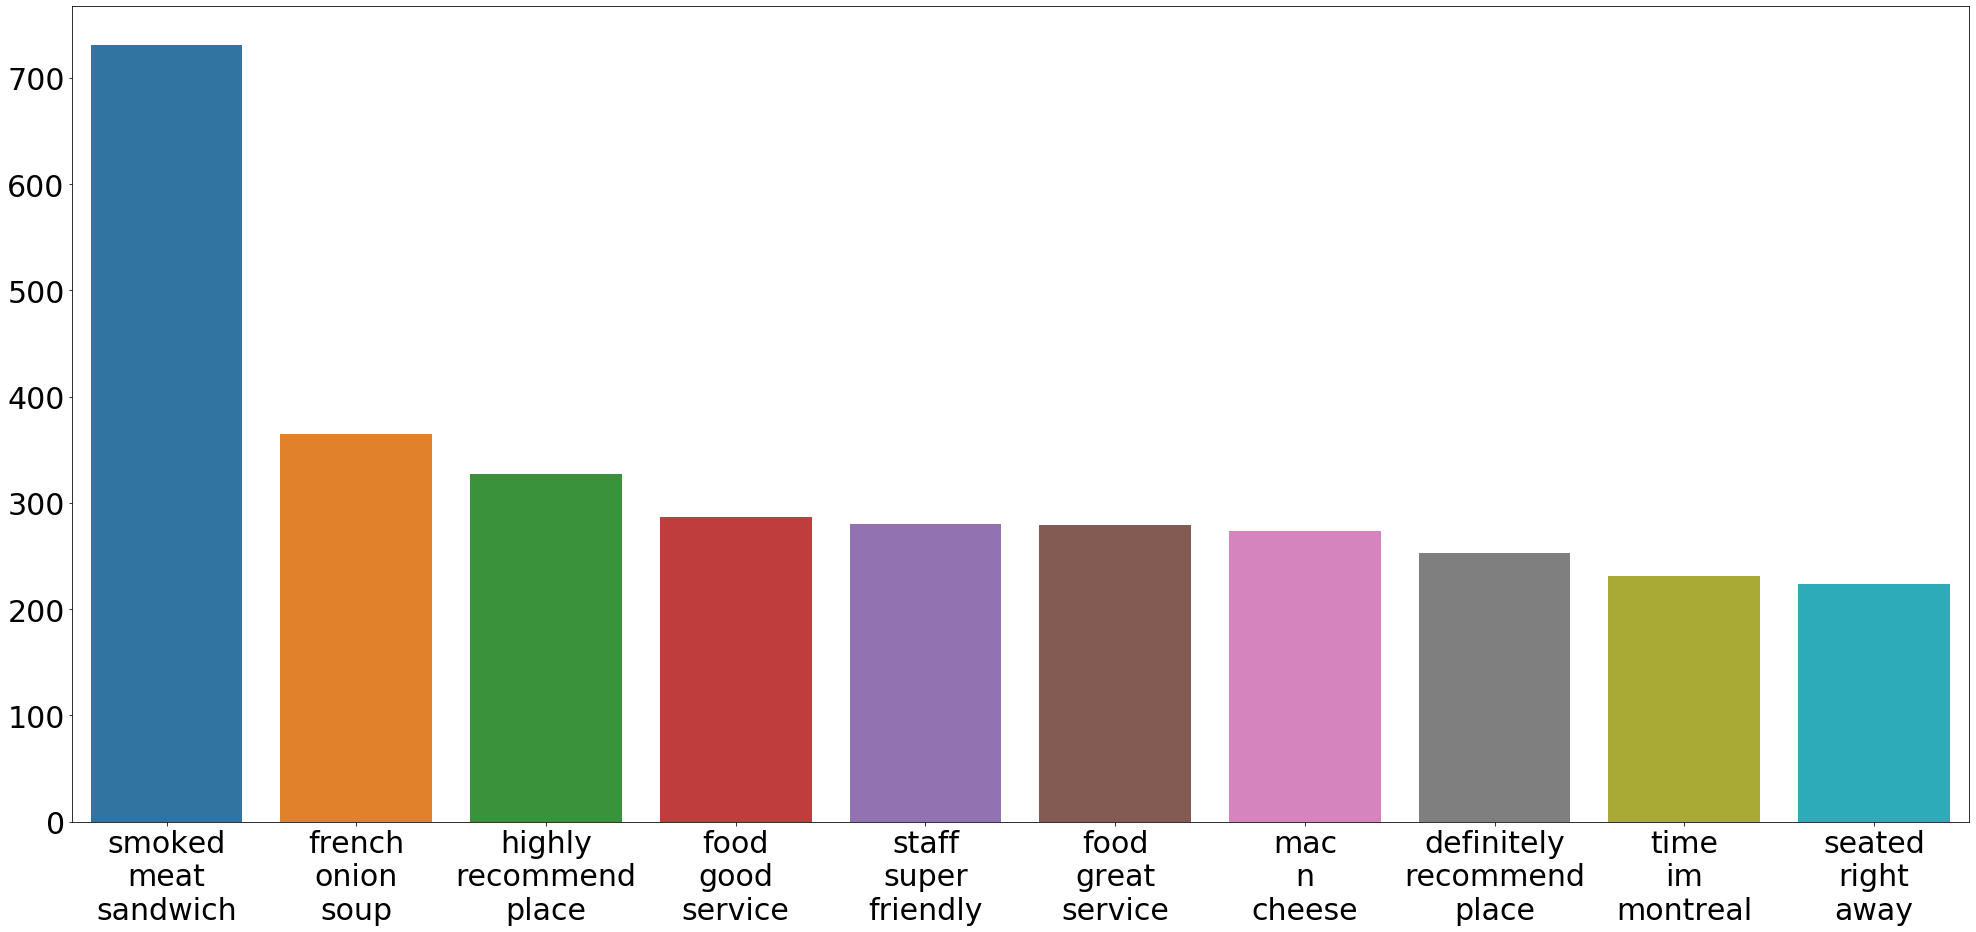

In [29]:
bar_qc = simple_bar('post_eda/eda_qc.p', 3, 10)
bar_qc.barplot()
bar_qc.count

# Wisconsin

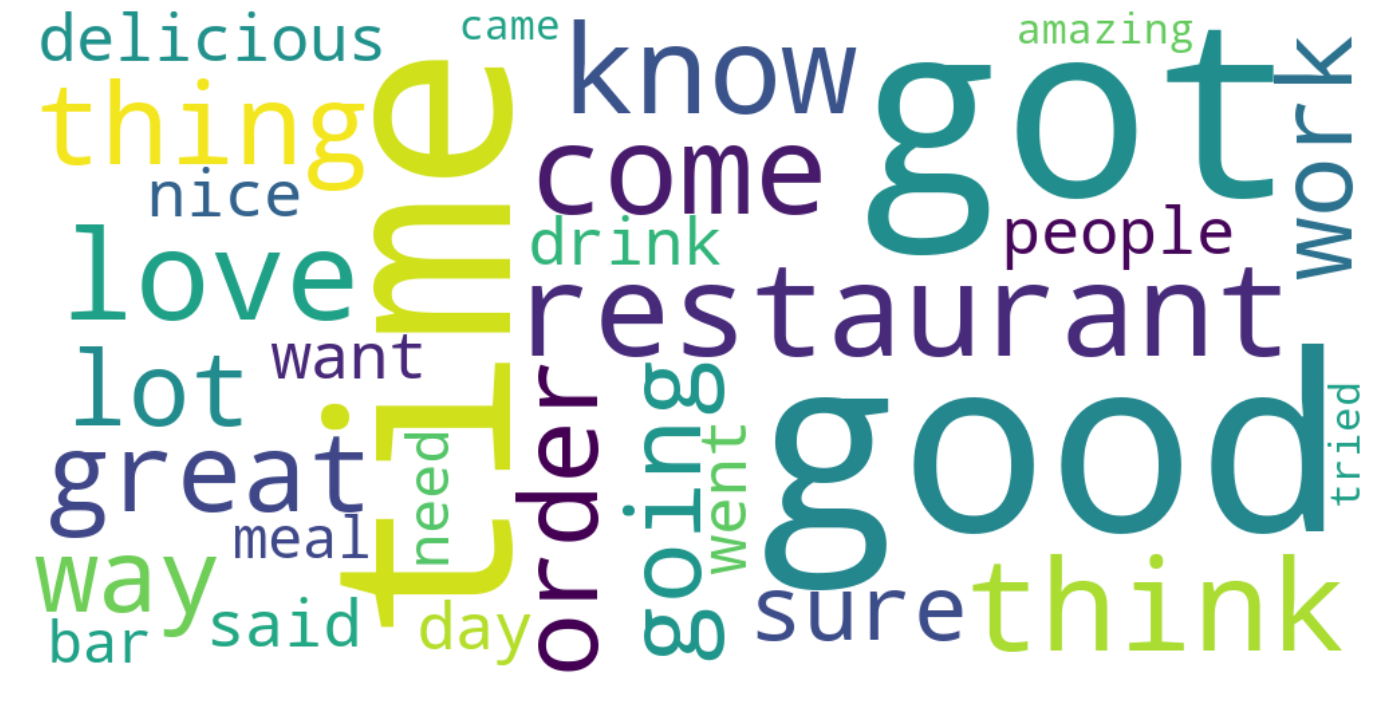

In [9]:
df_wi = pickle.load(open('by_states/df_wi.p', 'rb'))
df_wi.text = df_wi.text.apply(lambda x: clean_text_round(x))
clean_wi = df_wi

s_and_p(clean_wi)
pickle.dump(clean_wi, open('post_eda/eda_wi.p', 'wb'))

wordcloud_auto(clean_wi)

[(('cheese', 'curds'), 3598),
 (('food', 'good'), 3050),
 (('highly', 'recommend'), 2906),
 (('pretty', 'good'), 2852),
 (('customer', 'service'), 2809),
 (('great', 'place'), 2546),
 (('staff', 'friendly'), 2320),
 (('good', 'food'), 2241),
 (('ice', 'cream'), 2119),
 (('dont', 'know'), 2020)]

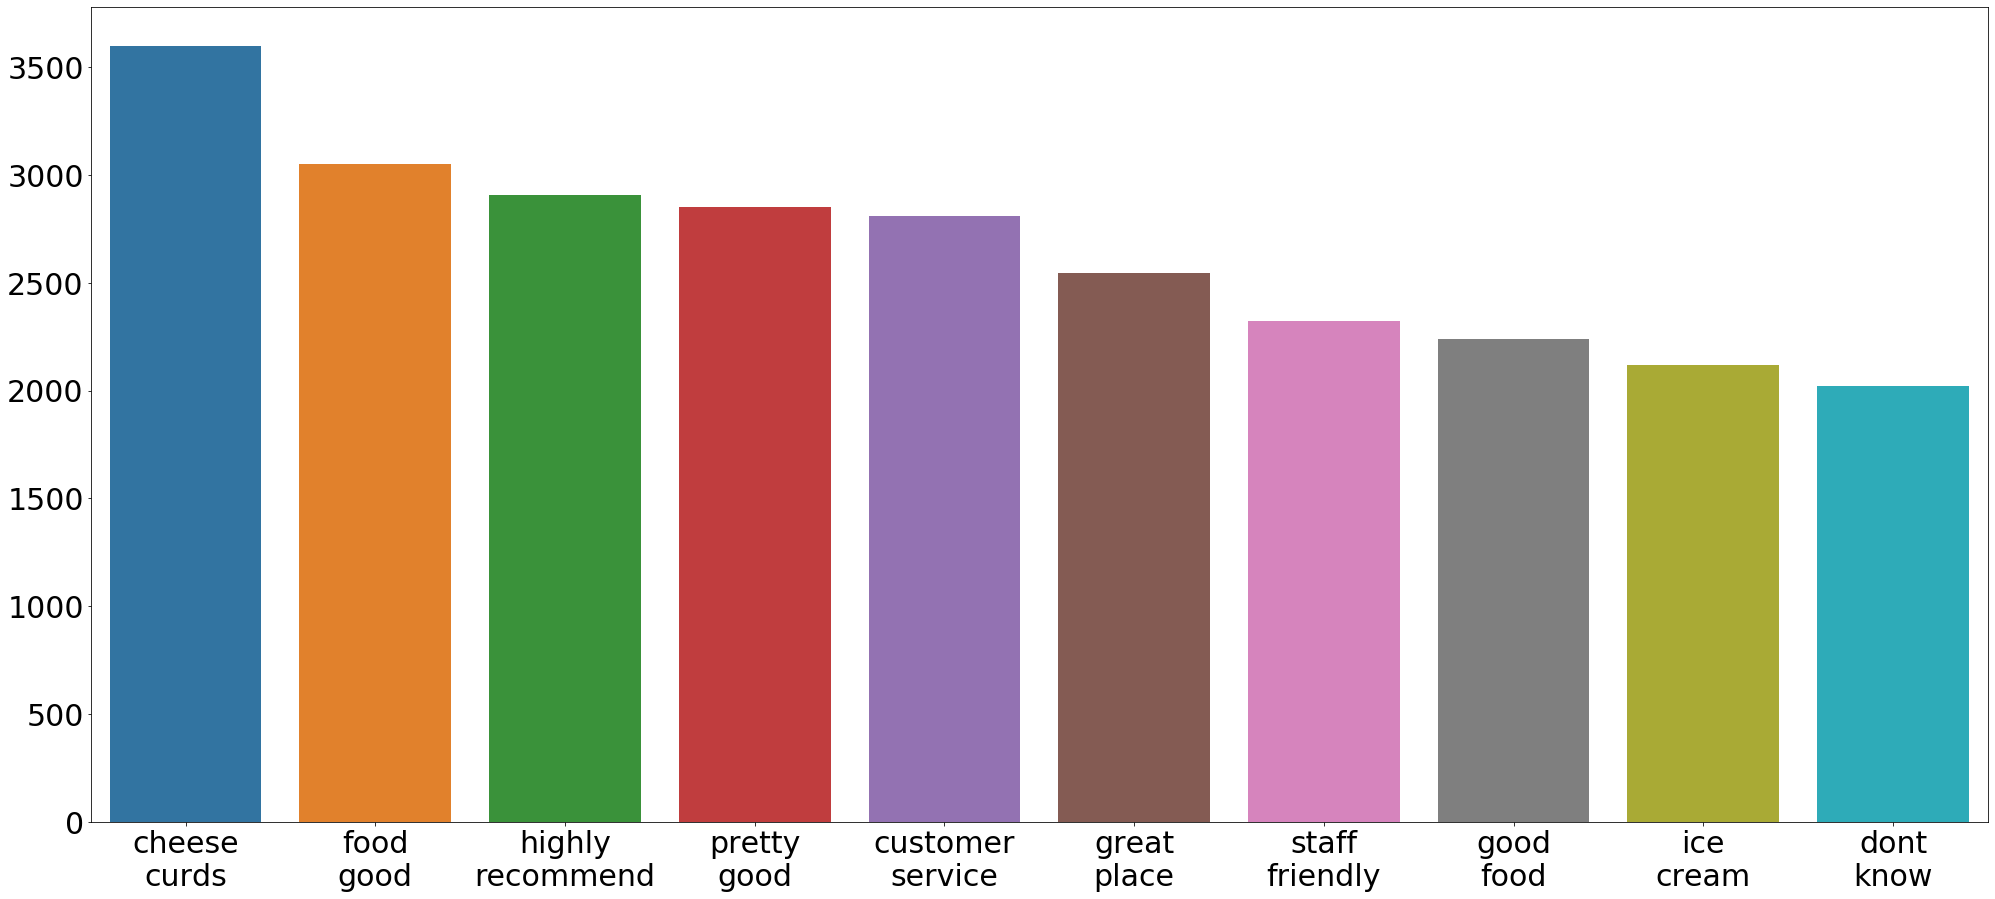

In [30]:
bar_wi = simple_bar('post_eda/eda_wi.p', 2, 10)
bar_wi.barplot()
bar_wi.count

[(('sweet', 'potato', 'fries'), 534),
 (('mac', 'n', 'cheese'), 405),
 (('fried', 'cheese', 'curds'), 353),
 (('food', 'good', 'service'), 294),
 (('food', 'great', 'service'), 291),
 (('food', 'pretty', 'good'), 285),
 (('seated', 'right', 'away'), 273),
 (('staff', 'friendly', 'helpful'), 270),
 (('staff', 'super', 'friendly'), 265),
 (('great', 'customer', 'service'), 260)]

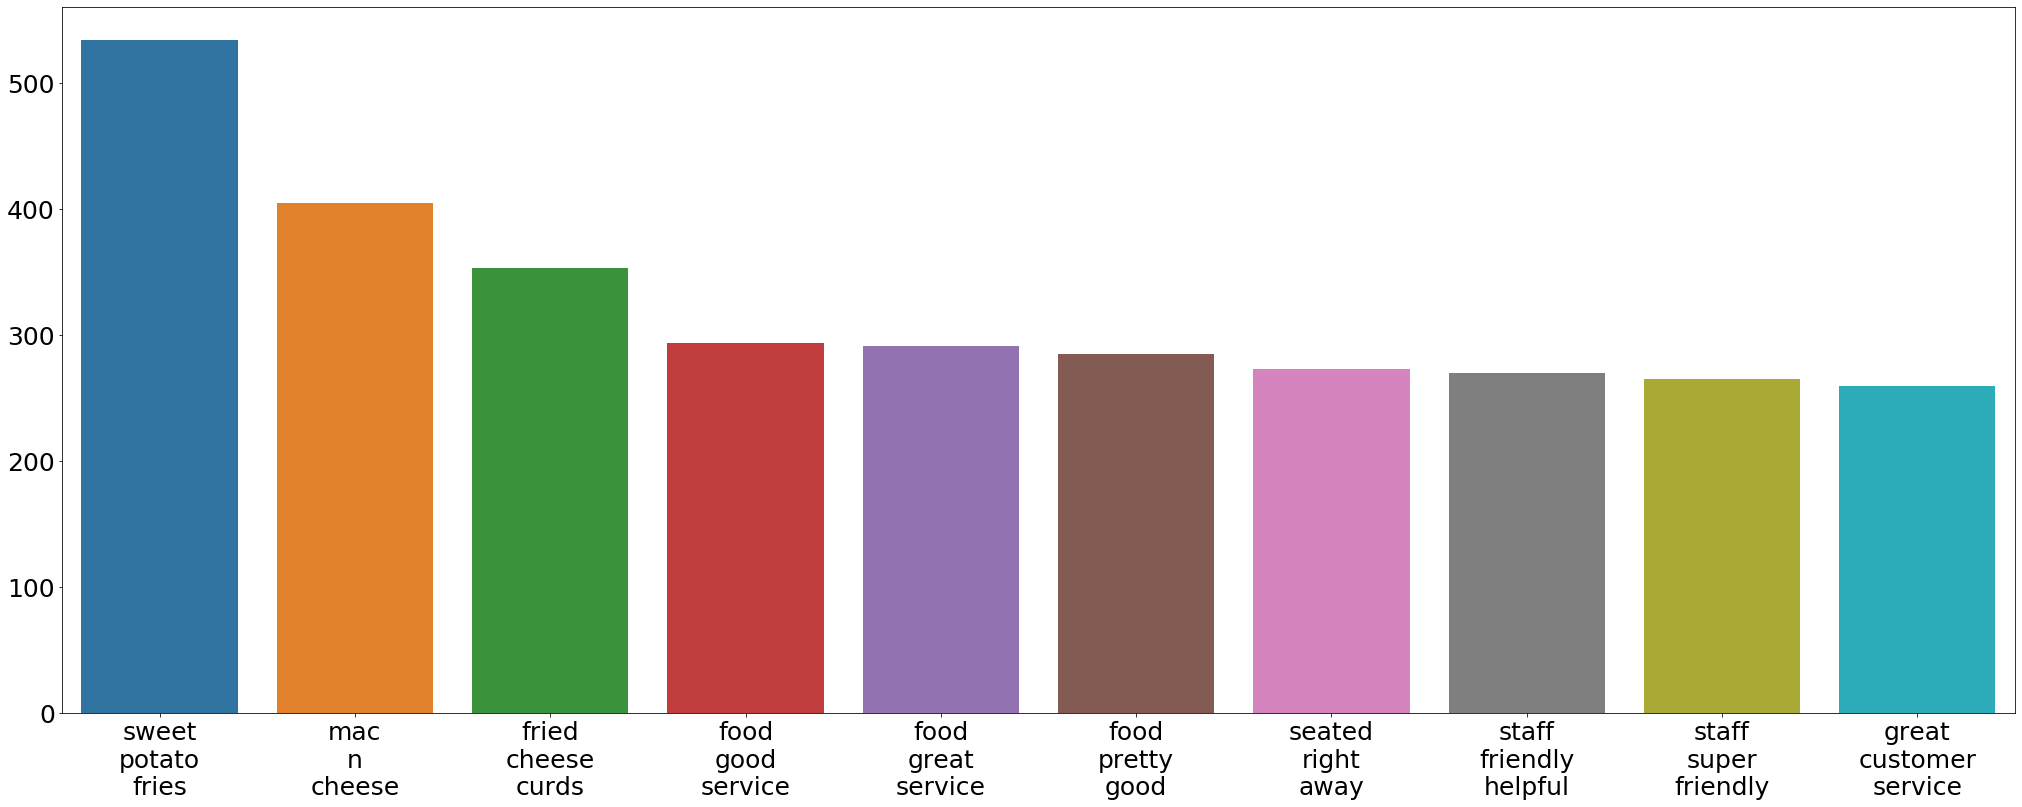

In [3]:
bar_wi = simple_bar('post_eda/eda_wi.p', 3, 10)
bar_wi.barplot()
bar_wi.count